In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

SIMPLE EDA

Training data shape: (9912, 14)

First few rows of the dataset:


,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72



Pawpularity Score Statistics:
count    9912.000000
mean       38.039044
std        20.591990
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


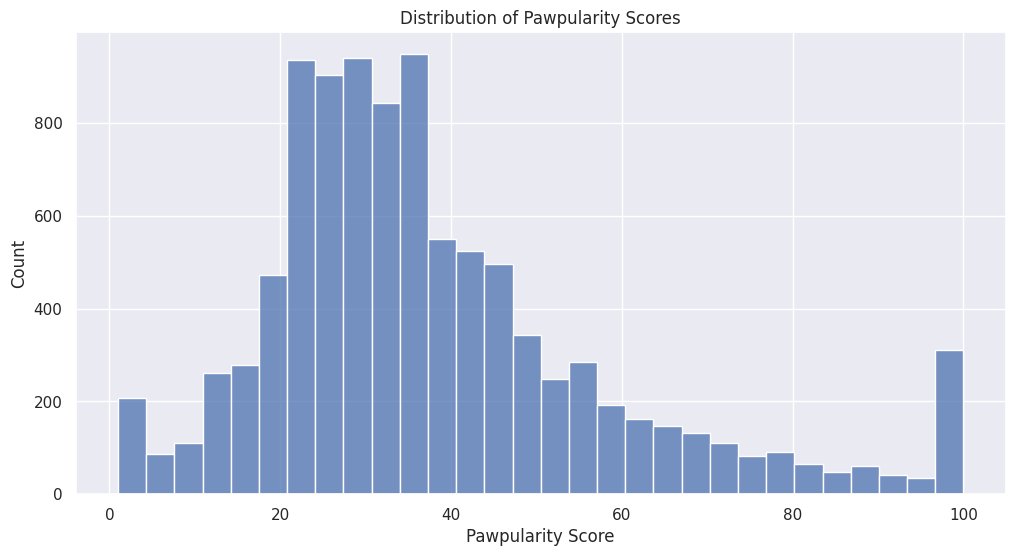

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


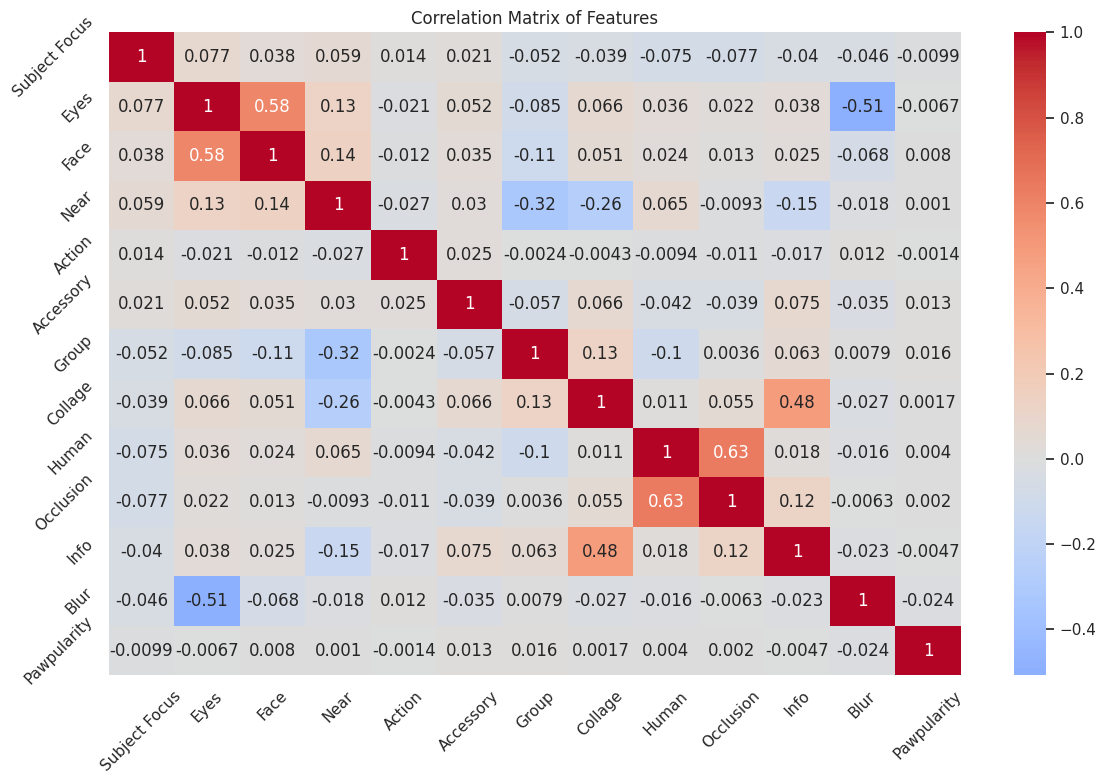

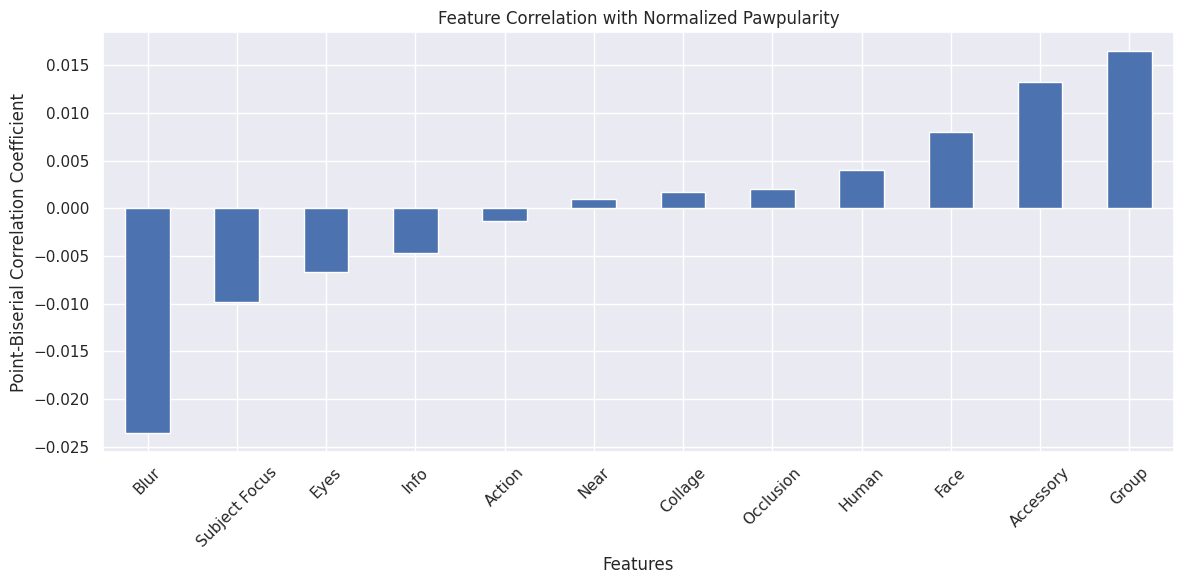


Correlation coefficients:
Group: 0.016
Accessory: 0.013
Face: 0.008
Human: 0.004
Occlusion: 0.002
Collage: 0.002
Near: 0.001
Action: -0.001
Info: -0.005
Eyes: -0.007
Subject Focus: -0.010
Blur: -0.024


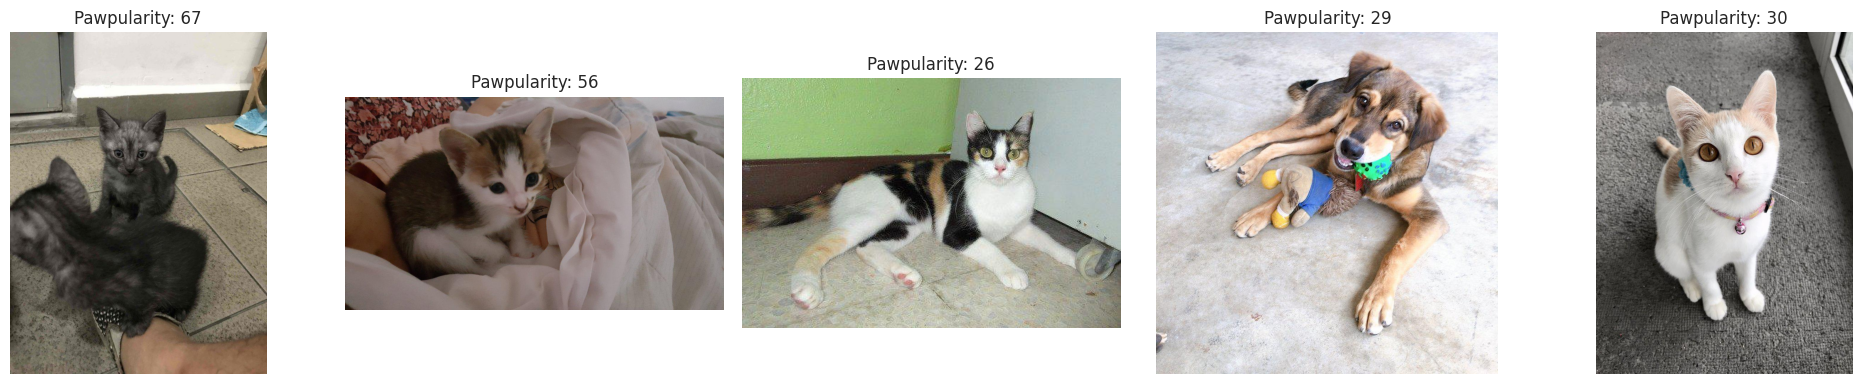

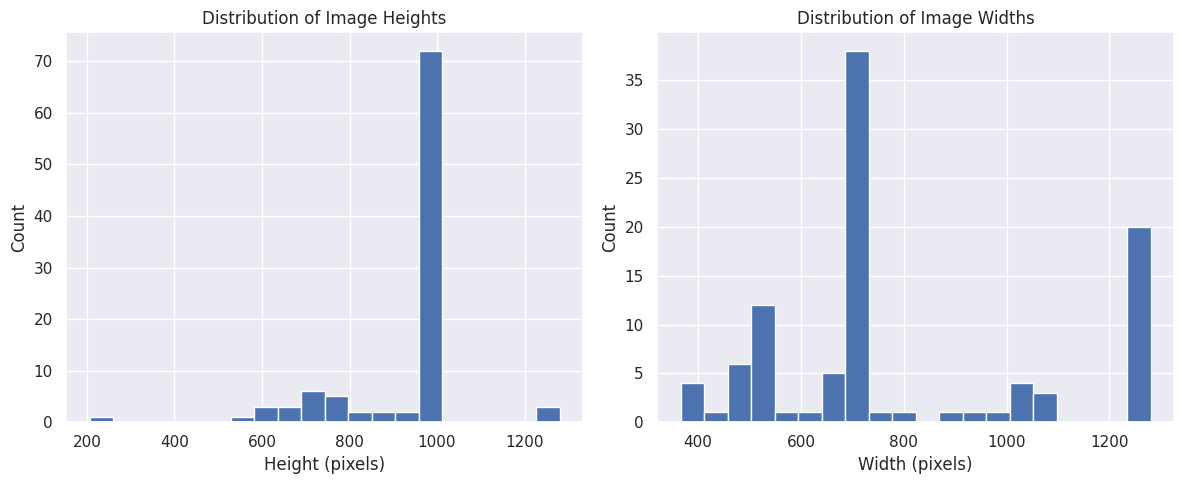


Metadata Feature Statistics:


,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
count,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000,9912.000000
mean,0.027643,0.772599,0.903955,0.861582,0.009988,0.067797,0.129338,0.049637,0.166263,0.172014,0.061239,0.070420
std,0.163957,0.419175,0.294668,0.345356,0.099444,0.251409,0.335591,0.217204,0.372335,0.377411,0.239780,0.255866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


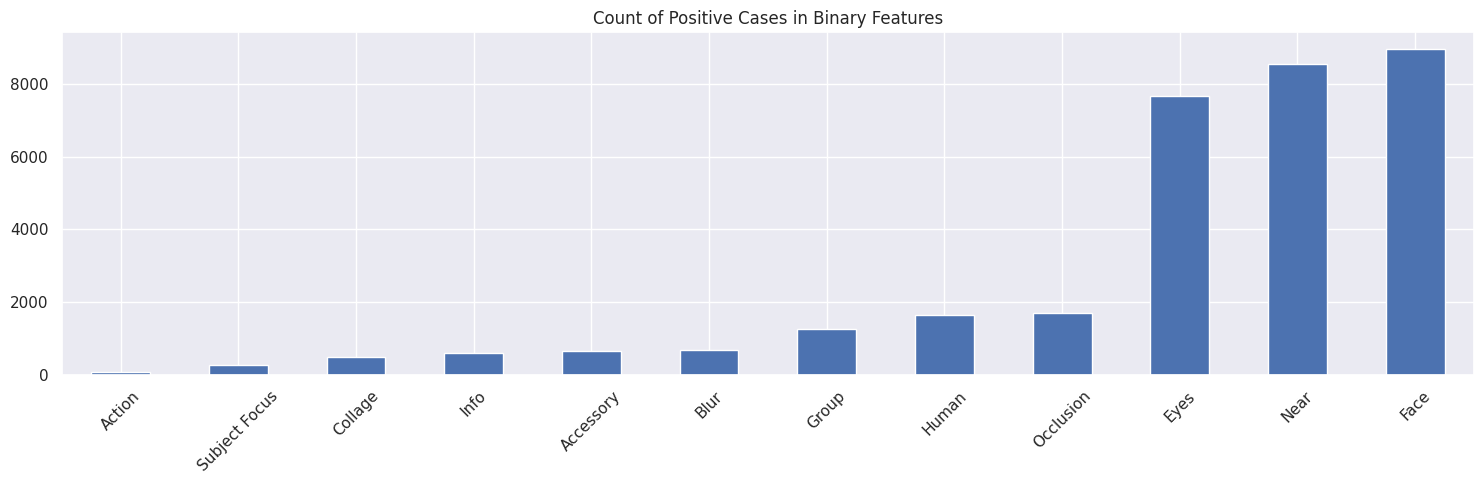

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import cv2
import os

plt.style.use('default')
sns.set_theme()

train_df = pd.read_csv('/kaggle/input/petfinder-pawpularity-score/train.csv')
print("Training data shape:", train_df.shape)
print("\nFirst few rows of the dataset:")
display(train_df.head())

# Basic statistics of Pawpularity scores
print("\nPawpularity Score Statistics:")
print(train_df['Pawpularity'].describe())

# Distribution of Pawpularity scores
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='Pawpularity', bins=30)
plt.title('Distribution of Pawpularity Scores')
plt.xlabel('Pawpularity Score')
plt.ylabel('Count')
plt.show()

# Image metadata features
metadata_features = [col for col in train_df.columns if col not in ['Id', 'Pawpularity']]

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[metadata_features + ['Pawpularity']].corr(), 
            annot=True, 
            cmap='coolwarm',
            center=0)
plt.title('Correlation Matrix of Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Normalize Pawpularity to 0-1 range
normalized_pawpularity = train_df['Pawpularity'] / 100

# Feature importance based on correlation with Pawpularity
correlations = train_df[metadata_features].corrwith(normalized_pawpularity)
plt.figure(figsize=(12, 6))
correlations.sort_values().plot(kind='bar')
plt.title('Feature Correlation with Normalized Pawpularity')
plt.xlabel('Features')
plt.ylabel('Point-Biserial Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print actual correlation values
print("\nCorrelation coefficients:")
for feature, corr in correlations.sort_values(ascending=False).items():
    print(f"{feature}: {corr:.3f}")

# Sample images
def display_sample_images(df, image_dir='/kaggle/input/petfinder-pawpularity-score/train', num_samples=5):
    plt.figure(figsize=(20, 4))
    sample_ids = df['Id'].sample(num_samples).values
    
    for idx, img_id in enumerate(sample_ids):
        img_path = os.path.join(image_dir, f'{img_id}.jpg')
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, num_samples, idx + 1)
        plt.imshow(img)
        plt.title(f'Pawpularity: {df[df["Id"] == img_id]["Pawpularity"].values[0]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(train_df)

# Image sizes
def get_image_size(image_id, image_dir='/kaggle/input/petfinder-pawpularity-score/train'):
    img_path = os.path.join(image_dir, f'{image_id}.jpg')
    img = cv2.imread(img_path)
    return img.shape

# Get image sizes for a sample of images
sample_sizes = train_df['Id'].sample(100).apply(get_image_size)
heights = [size[0] for size in sample_sizes]
widths = [size[1] for size in sample_sizes]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(heights, bins=20)
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(widths, bins=20)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Summary statistics for metadata features
print("\nMetadata Feature Statistics:")
display(train_df[metadata_features].describe())

# Count of binary features
plt.figure(figsize=(15, 5))
train_df[metadata_features].sum().sort_values().plot(kind='bar')
plt.title('Count of Positive Cases in Binary Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Very simple RESNET50 Model trained only on Images without the Metadata: 
RMSE: 20.25

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
from PIL import Image
from tqdm.auto import tqdm

class PetFinderDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        
        # Only keep Pawpularity scores
        self.pawpularity_array = self.df['Pawpularity'].astype('float32').values / 100.0
        
    def __len__(self):
        return len(self.df)
        
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        pawpularity = torch.tensor(self.pawpularity_array[idx], dtype=torch.float32)
        
        return image, pawpularity  # Only one return statement

class PawpularityModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Extract Image Features using ResNet50
        self.image_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
        num_features = self.image_model.fc.in_features
        
        # Last Layers
        self.final_layers = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 1)
        )
        
    def forward(self, image):
        features = self.image_model.conv1(image)
        features = self.image_model.bn1(features)
        features = self.image_model.relu(features)
        features = self.image_model.maxpool(features)
        
        features = self.image_model.layer1(features)
        features = self.image_model.layer2(features)
        features = self.image_model.layer3(features)
        features = self.image_model.layer4(features)
        
        features = self.image_model.avgpool(features)
        features = torch.flatten(features, 1)
        
        output = self.final_layers(features)
        return output
        
# RMSE loss
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, yhat, y):
        return torch.sqrt(self.mse(yhat, y))

# Transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomAffine(
        degrees=15,  # rotation
        translate=(0.1, 0.1),  # translation
        scale=(0.9, 1.1),  # scale
        shear=10  # shear
    ),
    transforms.ColorJitter(
        brightness=0.2,
        contrast=0.2,
        saturation=0.2,
        hue=0.1
    ),
    transforms.RandomAutocontrast(p=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                        std=[0.229, 0.224, 0.225])
])

# Split data
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Create datasets
train_dataset = PetFinderDataset(train_df, '/kaggle/input/petfinder-pawpularity-score/train', transform=train_transform)
val_dataset = PetFinderDataset(val_df, '/kaggle/input/petfinder-pawpularity-score/train', transform=train_transform)

# Initialize dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

# Training Init
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PawpularityModel().to(device)

criterion = RMSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.5, 
    patience=3, 
    verbose=True,
    min_lr=1e-6
)

# Training loop
num_epochs = 20
best_val_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    
    train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
    for images, targets in train_pbar: 
        images = images.to(device)
        targets = targets.to(device).view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        
        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        train_loss += loss.item()
        train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
 
    model.eval()
    val_loss = 0
    
    with torch.no_grad():
        val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Valid]')
        for images, targets in val_pbar:  # Removed metadata from unpacking
            images = images.to(device)
            targets = targets.to(device).view(-1, 1)
            
            outputs = model(images)  # Removed metadata input
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    
    # Adjust lr based on val loss
    scheduler.step(val_loss)
    
    print(f'\nEpoch [{epoch+1}/{num_epochs}] Summary:')
    print(f'Training Loss: {train_loss:.4f}')
    print(f'Validation Loss: {val_loss:.4f}')
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        print(f'New best model saved! (Val Loss: {val_loss:.4f})\n')

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 196MB/s]
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 1/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [1/20] Summary:
Training Loss: 0.6226
Validation Loss: 0.3858
New best model saved! (Val Loss: 0.3858)



Epoch 2/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 2/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [2/20] Summary:
Training Loss: 0.4652
Validation Loss: 0.2608
New best model saved! (Val Loss: 0.2608)



Epoch 3/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 3/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [3/20] Summary:
Training Loss: 0.4060
Validation Loss: 0.2758


Epoch 4/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 4/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [4/20] Summary:
Training Loss: 0.3896
Validation Loss: 0.2220
New best model saved! (Val Loss: 0.2220)



Epoch 5/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 5/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [5/20] Summary:
Training Loss: 0.3396
Validation Loss: 0.2190
New best model saved! (Val Loss: 0.2190)



Epoch 6/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 6/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [6/20] Summary:
Training Loss: 0.3224
Validation Loss: 0.2323


Epoch 7/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 7/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [7/20] Summary:
Training Loss: 0.3126
Validation Loss: 0.2200


Epoch 8/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 8/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [8/20] Summary:
Training Loss: 0.2907
Validation Loss: 0.2497


Epoch 9/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 9/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [9/20] Summary:
Training Loss: 0.2862
Validation Loss: 0.2104
New best model saved! (Val Loss: 0.2104)



Epoch 10/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>Exception ignored in: 
Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__

Traceback (most recent call last):
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
self._shutdown_workers()
    self._shutdown_workers()  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
        if w.is_alive():if w.is_alive():

  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
      File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
assert self._parent_pid == os.getpid(), 'can only test a

Epoch 10/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [10/20] Summary:
Training Loss: 0.2896
Validation Loss: 0.2144


Epoch 11/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 11/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [11/20] Summary:
Training Loss: 0.2717
Validation Loss: 0.2077
New best model saved! (Val Loss: 0.2077)



Epoch 12/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 12/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [12/20] Summary:
Training Loss: 0.2649
Validation Loss: 0.2636


Epoch 13/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 13/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [13/20] Summary:
Training Loss: 0.2538
Validation Loss: 0.2037
New best model saved! (Val Loss: 0.2037)



Epoch 14/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 14/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [14/20] Summary:
Training Loss: 0.2489
Validation Loss: 0.2396


Epoch 15/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 15/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [15/20] Summary:
Training Loss: 0.2536
Validation Loss: 0.2025
New best model saved! (Val Loss: 0.2025)



Epoch 16/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 16/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [16/20] Summary:
Training Loss: 0.2436
Validation Loss: 0.2693


Epoch 17/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 17/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [17/20] Summary:
Training Loss: 0.2440
Validation Loss: 0.2028


Epoch 18/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
Exception ignored in:   File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7a4831806a70>
    Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
if w.is_alive():    
self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
      File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
if w.is_alive():    assert self._parent_pid == os.getpid(), 'can only test a child process'

  File "/usr/lib/python3.10/multiprocessing/process.py", line 1

Epoch 18/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [18/20] Summary:
Training Loss: 0.2341
Validation Loss: 0.2060


Epoch 19/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 19/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [19/20] Summary:
Training Loss: 0.2346
Validation Loss: 0.2155


Epoch 20/20 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 20/20 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [20/20] Summary:
Training Loss: 0.2332
Validation Loss: 0.2094


VERY SIMPLE VISION TRANSFORMER TRAINING ONLY IMAGES:
RMSE: 21.87

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import vit_b_16, ViT_B_16_Weights
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image
from tqdm.auto import tqdm
import os

class PetFinderDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        
        # Only keep Pawpularity scores
        self.pawpularity_array = self.df['Pawpularity'].astype('float32').values / 100.0
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        pawpularity = torch.tensor(self.pawpularity_array[idx], dtype=torch.float32)
        
        return image, pawpularity

class PawpularityModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Use Vision Transformer
        self.image_model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
        num_features = self.image_model.heads.head.in_features
        self.image_model.heads = nn.Identity()  # Remove classification head
        
        # New final layers
        self.final_layers = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.GELU(),  # ViT typically uses GELU
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),
            nn.Linear(512, 128),
            nn.GELU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 1)
        )
        
    def forward(self, image):
        features = self.image_model(image)  # ViT handles the feature extraction
        output = self.final_layers(features)
        return output

# RMSE loss
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, yhat, y):
        return torch.sqrt(self.mse(yhat, y))

# Data augmentation and normalization for training
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViT-B/16 expects 224x224
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAffine(
        degrees=15,
        translate=(0.1, 0.1),
        scale=(0.9, 1.1),
        shear=10
    ),
    transforms.ColorJitter(
        brightness=0.2,
        contrast=0.2,
        saturation=0.2,
        hue=0.1
    ),
    transforms.RandomAutocontrast(p=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                        std=[0.229, 0.224, 0.225])
])

# Split data
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Create datasets
train_dataset = PetFinderDataset(train_df, '/kaggle/input/petfinder-pawpularity-score/train', transform=train_transform)
val_dataset = PetFinderDataset(val_df, '/kaggle/input/petfinder-pawpularity-score/train', transform=train_transform)

# Initialize ataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

# Training init
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PawpularityModel().to(device)

criterion = RMSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.5, 
    patience=3, 
    verbose=True,
    min_lr=1e-6
)

# Training loop
num_epochs = 10
best_val_loss = float('inf')

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    
    train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
    for images, targets in train_pbar:
        images = images.to(device)
        targets = targets.to(device).view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        
        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        train_loss += loss.item()
        train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    model.eval()
    val_loss = 0
    
    with torch.no_grad():
        val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Valid]')
        for images, targets in val_pbar:
            images = images.to(device)
            targets = targets.to(device).view(-1, 1)
            
            outputs = model(images)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    
    # Adjust lr based on val loss
    scheduler.step(val_loss)
    
    print(f'\nEpoch [{epoch+1}/{num_epochs}] Summary:')
    print(f'Training Loss: {train_loss:.4f}')
    print(f'Validation Loss: {val_loss:.4f}')
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        print(f'New best model saved! (Val Loss: {val_loss:.4f})\n')

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 219MB/s]  
/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/10 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [1/10] Summary:
Training Loss: 0.6006
Validation Loss: 0.3689
New best model saved! (Val Loss: 0.3689)



Epoch 2/10 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 2/10 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [2/10] Summary:
Training Loss: 0.4774
Validation Loss: 0.2478
New best model saved! (Val Loss: 0.2478)



Epoch 3/10 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 3/10 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [3/10] Summary:
Training Loss: 0.4196
Validation Loss: 0.2290
New best model saved! (Val Loss: 0.2290)



Epoch 4/10 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 4/10 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [4/10] Summary:
Training Loss: 0.3792
Validation Loss: 0.3415


Epoch 5/10 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 5/10 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [5/10] Summary:
Training Loss: 0.3617
Validation Loss: 0.2287
New best model saved! (Val Loss: 0.2287)



Epoch 6/10 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 6/10 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [6/10] Summary:
Training Loss: 0.3560
Validation Loss: 0.2556


Epoch 7/10 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 7/10 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [7/10] Summary:
Training Loss: 0.3519
Validation Loss: 0.2261
New best model saved! (Val Loss: 0.2261)



Epoch 8/10 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
Traceback (most recent call last):
    self._shutdown_workers()  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    self._shutdown_workers()    if w.is_alive():
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers

    if w.is_alive():  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.10/multiprocessing/process.py", line 16

Epoch 8/10 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [8/10] Summary:
Training Loss: 0.3276
Validation Loss: 0.2272


Epoch 9/10 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 9/10 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [9/10] Summary:
Training Loss: 0.3125
Validation Loss: 0.2187
New best model saved! (Val Loss: 0.2187)



Epoch 10/10 [Train]:   0%|          | 0/124 [00:00<?, ?it/s]

Epoch 10/10 [Valid]:   0%|          | 0/31 [00:00<?, ?it/s]


Epoch [10/10] Summary:
Training Loss: 0.3050
Validation Loss: 0.2244


VISION TRANSFORMER ONLY ON IMAGES WITH LAYER FREEZING
RMSE: 19.24

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [1/10] Summary:
Training Loss: 0.2396
Validation Loss: 0.2083
New best model saved! (Val Loss: 0.2083)



Epoch 2/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process


Epoch 2/10 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [2/10] Summary:
Training Loss: 0.1891
Validation Loss: 0.1954
New best model saved! (Val Loss: 0.1954)



Epoch 3/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3/10 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [3/10] Summary:
Training Loss: 0.1791
Validation Loss: 0.1937
New best model saved! (Val Loss: 0.1937)



Epoch 4/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 4/10 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [4/10] Summary:
Training Loss: 0.1704
Validation Loss: 0.1992


Epoch 5/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 5/10 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [5/10] Summary:
Training Loss: 0.1649
Validation Loss: 0.1961


Epoch 6/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    Exception ignored in: if w.is_alive():<function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>

  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    assert self._parent_pid == os.getpid(), 'can only test a child process'    self._shutdown_workers()

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
AssertionError    : can only test a child processif w.is_alive():

  File "/usr/lib/

Epoch 6/10 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>assert self._parent_pid == os.getpid(), 'can only test a child process'

Traceback (most recent call last):
AssertionError  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
:     can only test a child processself._shutdown_workers()

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
Exception ignored in:     <function _M


Epoch [6/10] Summary:
Training Loss: 0.1635
Validation Loss: 0.1967


Epoch 7/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():  File "/usr/lib/p

Epoch 7/10 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [7/10] Summary:
Training Loss: 0.1530
Validation Loss: 0.1958


Epoch 8/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 8/10 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [8/10] Summary:
Training Loss: 0.1484
Validation Loss: 0.1946


Epoch 9/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 9/10 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [9/10] Summary:
Training Loss: 0.1480
Validation Loss: 0.1924
New best model saved! (Val Loss: 0.1924)



Epoch 10/10 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 10/10 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [10/10] Summary:
Training Loss: 0.1449
Validation Loss: 0.1945


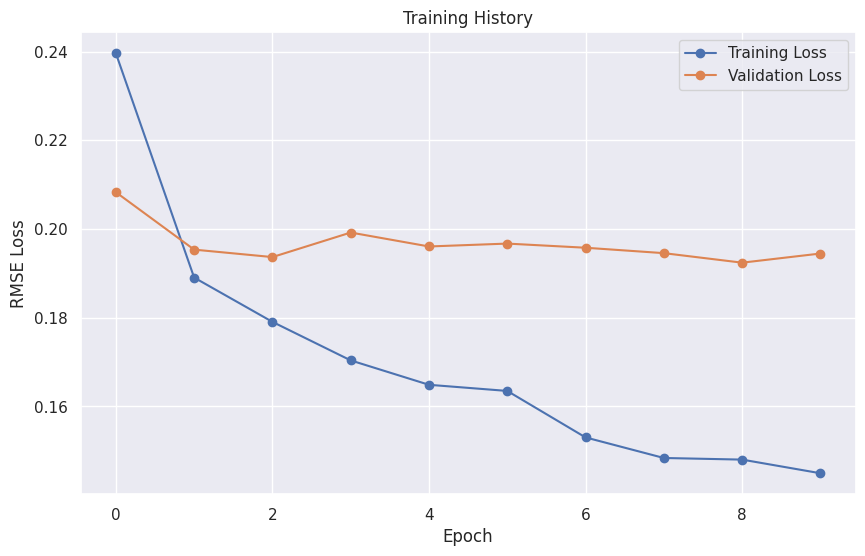


Best Validation Loss: 0.1924


In [15]:
# Import additional required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import vit_b_16, ViT_B_16_Weights
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image
from tqdm.auto import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

class PetFinderDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        
        # Only keep Pawpularity scores
        self.pawpularity_array = self.df['Pawpularity'].astype('float32').values / 100.0
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        pawpularity = torch.tensor(self.pawpularity_array[idx], dtype=torch.float32)
        
        return image, pawpularity

class PawpularityModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Freeze most of the ViT layers
        self.image_model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
        for param in self.image_model.parameters():
            param.requires_grad = False
        
        # Only fine-tune the last transformer blocks
        for param in self.image_model.encoder.layers[-2:].parameters():
            param.requires_grad = True
            
        num_features = self.image_model.heads.head.in_features
        self.image_model.heads = nn.Identity()
        
        # Simplified final layers to reduce overfitting
        self.final_layers = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.ReLU(), 
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),  
            nn.Linear(256, 1),
            nn.Sigmoid() 
        )
        
    def forward(self, image):
        features = self.image_model(image)
        output = self.final_layers(features)
        return output

# RMSE loss
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, yhat, y):
        return torch.sqrt(self.mse(yhat, y))

# Data augmentation and normalization for training
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViT-B/16 expects 224x224
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAffine(
        degrees=15,
        translate=(0.1, 0.1),
        scale=(0.9, 1.1),
        shear=10
    ),
    transforms.ColorJitter(
        brightness=0.2,
        contrast=0.2,
        saturation=0.2,
        hue=0.1
    ),
    transforms.RandomAutocontrast(p=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                        std=[0.229, 0.224, 0.225])
])

# Split data
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Create datasets
train_dataset = PetFinderDataset(train_df, '/kaggle/input/petfinder-pawpularity-score/train', transform=train_transform)
val_dataset = PetFinderDataset(val_df, '/kaggle/input/petfinder-pawpularity-score/train', transform=train_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4)

# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PawpularityModel().to(device)

criterion = RMSELoss()
optimizer = optim.AdamW([
    {'params': model.image_model.parameters(), 'lr': 1e-5},
    {'params': model.final_layers.parameters(), 'lr': 1e-3}
], weight_decay=0.01)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.2,
    patience=2,
    verbose=True,
    min_lr=1e-7
)

# Training loop
num_epochs = 10
best_val_loss = float('inf')
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    
    train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
    for images, targets in train_pbar:
        images = images.to(device)
        targets = targets.to(device).view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        
        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        train_loss += loss.item()
        train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    model.eval()
    val_loss = 0
    
    with torch.no_grad():
        val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Valid]')
        for images, targets in val_pbar:
            images = images.to(device)
            targets = targets.to(device).view(-1, 1)
            
            outputs = model(images)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    
    # Track losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Adjust lr based on val loss
    scheduler.step(val_loss)
    
    print(f'\nEpoch [{epoch+1}/{num_epochs}] Summary:')
    print(f'Training Loss: {train_loss:.4f}')
    print(f'Validation Loss: {val_loss:.4f}')
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        print(f'New best model saved! (Val Loss: {val_loss:.4f})\n')

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='o')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print final best loss
print(f"\nBest Validation Loss: {min(val_losses):.4f}")

FINAL VIT ONLY ON IMAGES WITH OPTIMIZED FREEZING:
RSME: 17.72

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import vit_b_16, ViT_B_16_Weights
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image
from tqdm.auto import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

class PetFinderDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        
        # Only keep Pawpularity scores
        self.pawpularity_array = self.df['Pawpularity'].astype('float32').values / 100.0
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        pawpularity = torch.tensor(self.pawpularity_array[idx], dtype=torch.float32)
        
        return image, pawpularity

class PawpularityModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.image_model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
        
        # Freeze Layers
        for param in self.image_model.parameters():
            param.requires_grad = False
        
        # Fine-tune more layers
        for param in self.image_model.encoder.layers[-4:].parameters():  # Last 4 blocks
            param.requires_grad = True
            
        num_features = self.image_model.heads.head.in_features
        self.image_model.heads = nn.Identity()
        
        # Modified final layers with residual connections
        self.final_layers = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        
    def forward(self, image):
        features = self.image_model(image)
        output = self.final_layers(features)
        return output

# RMSE loss
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, yhat, y):
        return torch.sqrt(self.mse(yhat, y))
        
# Gradual unfreezing
def unfreeze_model_gradually(model, epoch):
    if epoch == 5:
        # Unfreeze last 6 layers
        for param in model.image_model.encoder.layers[-6:].parameters():
            param.requires_grad = True
    elif epoch == 10:
        # Unfreeze all layers
        for param in model.image_model.parameters():
            param.requires_grad = True
            
# Data augmentation and normalization for training
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViT-B/16 expects 224x224
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAffine(
        degrees=15,
        translate=(0.1, 0.1),
        scale=(0.9, 1.1),
        shear=10
    ),
    transforms.ColorJitter(
        brightness=0.2,
        contrast=0.2,
        saturation=0.2,
        hue=0.1
    ),
    transforms.RandomAutocontrast(p=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                        std=[0.229, 0.224, 0.225])
])

# Split data
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Create datasets
train_dataset = PetFinderDataset(train_df, '/kaggle/input/petfinder-pawpularity-score/train', transform=train_transform)
val_dataset = PetFinderDataset(val_df, '/kaggle/input/petfinder-pawpularity-score/train', transform=train_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4)

# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PawpularityModel().to(device)

criterion = RMSELoss()
optimizer = optim.AdamW([
    {'params': model.image_model.parameters(), 'lr': 1e-5},
    {'params': model.final_layers.parameters(), 'lr': 1e-3}
], weight_decay=0.05)  # Increased from 0.01

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.2,
    patience=2,
    verbose=True,
    min_lr=1e-7
)

# Training loop
num_epochs = 20
best_val_loss = float('inf')
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    unfreeze_model_gradually(model, epoch)
    model.train()
    train_loss = 0
    
    train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
    for images, targets in train_pbar:
        images = images.to(device)
        targets = targets.to(device).view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        
        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        train_loss += loss.item()
        train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    model.eval()
    val_loss = 0
    
    with torch.no_grad():
        val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Valid]')
        for images, targets in val_pbar:
            images = images.to(device)
            targets = targets.to(device).view(-1, 1)
            
            outputs = model(images)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    
    # Track losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Adjust learning rate based on validation loss
    scheduler.step(val_loss)
    
    print(f'\nEpoch [{epoch+1}/{num_epochs}] Summary:')
    print(f'Training Loss: {train_loss:.4f}')
    print(f'Validation Loss: {val_loss:.4f}')
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
        print(f'New best model saved! (Val Loss: {val_loss:.4f})\n')

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='o')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print final best loss
print(f"\nBest Validation Loss: {min(val_losses):.4f}")

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/20 [Train]:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 1/20 [Valid]:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch [1/20] Summary:
Training Loss: 0.1977
Validation Loss: 0.1794
New best model saved! (Val Loss: 0.1794)



Epoch 2/20 [Train]:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 2/20 [Valid]:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch [2/20] Summary:
Training Loss: 0.1774
Validation Loss: 0.1836


Epoch 3/20 [Train]:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 3/20 [Valid]:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch [3/20] Summary:
Training Loss: 0.1735
Validation Loss: 0.1772
New best model saved! (Val Loss: 0.1772)



Epoch 4/20 [Train]:   0%|          | 0/32 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 4/20 [Valid]:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch [4/20] Summary:
Training Loss: 0.1666
Validation Loss: 0.1788


Epoch 5/20 [Train]:   0%|          | 0/32 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 5/20 [Valid]:   0%|          | 0/8 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
Exception ignored in:     <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>self._shutdown_workers()

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
if w.is_alive():    self._shutdown_workers()

  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
      File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
assert self._parent_pid == os.getpid(), 'can only test a child process'    
if w.is_alive():AssertionError  File "/usr/lib/python3.10/multiprocessing/proces


Epoch [5/20] Summary:
Training Loss: 0.1622
Validation Loss: 0.1810


Epoch 6/20 [Train]:   0%|          | 0/32 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 6/20 [Valid]:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch [6/20] Summary:
Training Loss: 0.1569
Validation Loss: 0.1819


Epoch 7/20 [Train]:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 7/20 [Valid]:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch [7/20] Summary:
Training Loss: 0.1446
Validation Loss: 0.1816


Epoch 8/20 [Train]:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 8/20 [Valid]:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch [8/20] Summary:
Training Loss: 0.1400
Validation Loss: 0.1815


Epoch 9/20 [Train]:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 9/20 [Valid]:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch [9/20] Summary:
Training Loss: 0.1371
Validation Loss: 0.1858


Epoch 10/20 [Train]:   0%|          | 0/32 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 10/20 [Valid]:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch [10/20] Summary:
Training Loss: 0.1344
Validation Loss: 0.1847


Epoch 11/20 [Train]:   0%|          | 0/32 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7918b0026560>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

OutOfMemoryError: CUDA out of memory. Tried to allocate 222.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 16.12 MiB is free. Process 6636 has 14.72 GiB memory in use. Of the allocated memory 13.68 GiB is allocated by PyTorch, and 926.24 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [18]:
import os
import torch
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm.auto import tqdm
from PIL import Image

# Load test dataset
class TestPetFinderDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        self.metadata_features = [col for col in df.columns if col not in ['Id', 'Pawpularity']]
        self.metadata_array = self.df[self.metadata_features].astype('float32').values
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        metadata = torch.tensor(self.metadata_array[idx], dtype=torch.float32)
        
        return image, metadata

# Load test data
TEST_IMG_DIR = '/kaggle/input/petfinder-pawpularity-score/train'
test_df = pd.read_csv('/kaggle/input/petfinder-pawpularity-score/train.csv')

# Define test transform
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

# Create test dataset and dataloader
test_dataset = TestPetFinderDataset(test_df, TEST_IMG_DIR, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Load model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_metadata_features = len([col for col in test_df.columns if col not in ['Id', 'Pawpularity']])
model = PawpularityModel(num_metadata_features=num_metadata_features).to(device)
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model.eval()

# Run predictions
predictions = []
with torch.no_grad():
    for images, metadata in tqdm(test_loader, desc='Testing'):
        images = images.to(device)
        metadata = metadata.to(device)
        outputs = model(images, metadata).cpu().numpy()
        predictions.extend(outputs.squeeze().tolist())

# Convert predictions back to 0-100 range
predictions = [max(0, min(100, p * 100)) for p in predictions]

# Save predictions
test_df['Pawpularity'] = predictions
test_df[['Id', 'Pawpularity']].to_csv('submission.csv', index=False)
print('Test predictions saved to submission.csv')


TypeError: PawpularityModel.__init__() got an unexpected keyword argument 'num_metadata_features'

In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


FIRST OPENAICLIP MODEL ONLY IMAGES RMSE: 18.45

Epoch 1/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [1/20] Summary:
Training Loss: 0.2071
Validation Loss: 0.1877
New best model saved! (Val Loss: 0.1877)



Epoch 2/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 2/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [2/20] Summary:
Training Loss: 0.1794
Validation Loss: 0.1883


Epoch 3/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 3/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [3/20] Summary:
Training Loss: 0.1724
Validation Loss: 0.1861
New best model saved! (Val Loss: 0.1861)



Epoch 4/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 4/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [4/20] Summary:
Training Loss: 0.1690
Validation Loss: 0.1845
New best model saved! (Val Loss: 0.1845)



Epoch 5/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 5/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [5/20] Summary:
Training Loss: 0.1626
Validation Loss: 0.1896


Epoch 6/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 6/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>self._shutdown_workers()

Traceback (most recent call last):
  File "/usr/local/lib/pyt


Epoch [6/20] Summary:
Training Loss: 0.1644
Validation Loss: 0.1892


Epoch 7/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 7/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [7/20] Summary:
Training Loss: 0.1536
Validation Loss: 0.1907


Epoch 8/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 8/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [8/20] Summary:
Training Loss: 0.1405
Validation Loss: 0.1896


Epoch 9/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 9/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [9/20] Summary:
Training Loss: 0.1354
Validation Loss: 0.1910


Epoch 10/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 10/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [10/20] Summary:
Training Loss: 0.1325
Validation Loss: 0.1904


Epoch 11/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 11/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
self._shutdown_workers()    
Exception ignored in: self._shutdown_workers()  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers

<function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>          File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
if w.is_alive():
if w.is_alive():
Traceback (most recent call last):

  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
  File "/usr/l


Epoch [11/20] Summary:
Training Loss: 0.1273
Validation Loss: 0.1881


Epoch 12/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 12/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [12/20] Summary:
Training Loss: 0.1273
Validation Loss: 0.1912


Epoch 13/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 13/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [13/20] Summary:
Training Loss: 0.1271
Validation Loss: 0.1901


Epoch 14/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 14/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [14/20] Summary:
Training Loss: 0.1258
Validation Loss: 0.1872


Epoch 15/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 15/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [15/20] Summary:
Training Loss: 0.1252
Validation Loss: 0.1947


Epoch 16/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 16/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [16/20] Summary:
Training Loss: 0.1249
Validation Loss: 0.1898


Epoch 17/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 17/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [17/20] Summary:
Training Loss: 0.1245
Validation Loss: 0.1885


Epoch 18/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 18/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [18/20] Summary:
Training Loss: 0.1251
Validation Loss: 0.1868


Epoch 19/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 19/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Epoch [19/20] Summary:
Training Loss: 0.1240
Validation Loss: 0.1895


Epoch 20/20 [Train]:   0%|          | 0/50 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d602e0f7d00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 20/20 [Valid]:   0%|          | 0/13 [00:00<?, ?it/s]


Epoch [20/20] Summary:
Training Loss: 0.1256
Validation Loss: 0.1881


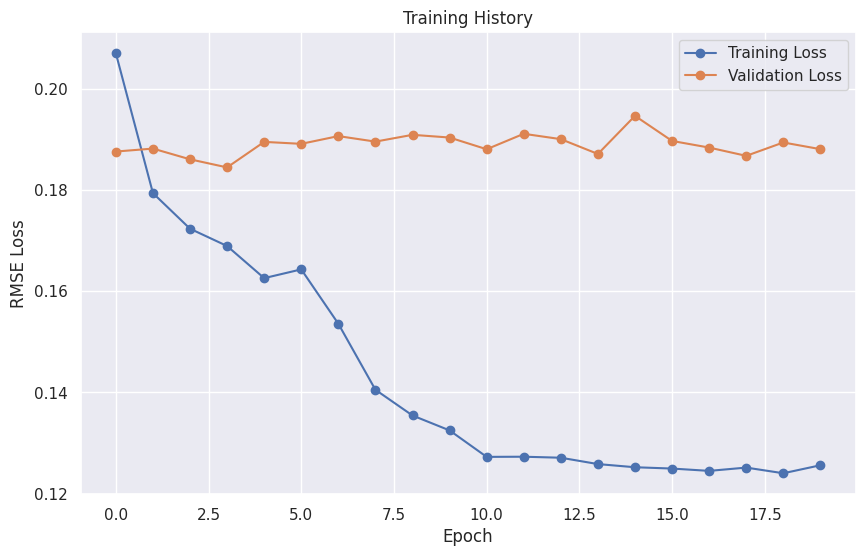


Best Validation Loss: 0.1845


In [6]:
# Import additional required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import vit_b_16, ViT_B_16_Weights
from torchvision import transforms
from sklearn.model_selection import train_test_split
from PIL import Image
from tqdm.auto import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

class PetFinderDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        
        # Only keep Pawpularity scores
        self.pawpularity_array = self.df['Pawpularity'].astype('float32').values / 100.0
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        pawpularity = torch.tensor(self.pawpularity_array[idx], dtype=torch.float32)
        
        return image, pawpularity
        
from transformers import CLIPModel, CLIPProcessor

class PawpularityModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Load CLIP model
        self.clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
        self.processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
        
        # Freeze CLIP parameters initially
        for param in self.clip.parameters():
            param.requires_grad = False
        
        # Unfreeze last few layers of vision encoder
        for param in self.clip.vision_model.encoder.layers[-4:].parameters():
            param.requires_grad = True
            
        # Get the dimension of CLIP's vision output
        num_features = self.clip.vision_model.config.hidden_size  # Usually 768 for base model
        
        # Modified final layers
        self.final_layers = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        
    def forward(self, image):
        # Extract vision features from CLIP
        vision_outputs = self.clip.vision_model(image)
        image_features = vision_outputs.pooler_output
        
        # Pass through final layers
        output = self.final_layers(image_features)
        return output

#  RMSE loss
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self, yhat, y):
        return torch.sqrt(self.mse(yhat, y))
        
# Gradual unfreezing 
def unfreeze_model_gradually(model, epoch):
    if epoch == 5:
        # Unfreeze last 6 layers
        for param in model.clip.vision_model.encoder.layers[-6:].parameters():
            param.requires_grad = True
    elif epoch == 10:
        # Unfreeze all vision encoder layers
        for param in model.clip.vision_model.parameters():
            param.requires_grad = True

# Transforms
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAffine(
        degrees=15,
        translate=(0.1, 0.1),
        scale=(0.9, 1.1),
        shear=10
    ),
    transforms.ColorJitter(
        brightness=0.2,
        contrast=0.2,
        saturation=0.2,
        hue=0.1
    ),
    transforms.RandomAutocontrast(p=0.2),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073], 
                        std=[0.26862954, 0.26130258, 0.27577711])  # CLIP specific normalization
])

# Split data
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Create datasets
train_dataset = PetFinderDataset(train_df, '/kaggle/input/petfinder-pawpularity-score/train', transform=train_transform)
val_dataset = PetFinderDataset(val_df, '/kaggle/input/petfinder-pawpularity-score/train', transform=train_transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PawpularityModel().to(device)

criterion = RMSELoss()
optimizer = optim.AdamW([
    {'params': model.clip.vision_model.parameters(), 'lr': 1e-5},
    {'params': model.final_layers.parameters(), 'lr': 1e-3}
], weight_decay=0.05)

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.2,
    patience=2,
    verbose=True,
    min_lr=1e-7
)

# Training loop
num_epochs = 20
best_val_loss = float('inf')
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    unfreeze_model_gradually(model, epoch)
    model.train()
    train_loss = 0
    
    train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
    for images, targets in train_pbar:
        images = images.to(device)
        targets = targets.to(device).view(-1, 1)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, targets)
        loss.backward()
        
        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        
        train_loss += loss.item()
        train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    model.eval()
    val_loss = 0
    
    with torch.no_grad():
        val_pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Valid]')
        for images, targets in val_pbar:
            images = images.to(device)
            targets = targets.to(device).view(-1, 1)
            
            outputs = model(images)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)
    
    # Track losses
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    # Adjust learning rate based on validation loss
    scheduler.step(val_loss)
    
    print(f'\nEpoch [{epoch+1}/{num_epochs}] Summary:')
    print(f'Training Loss: {train_loss:.4f}')
    print(f'Validation Loss: {val_loss:.4f}')
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_modelclip.pth')
        print(f'New best model saved! (Val Loss: {val_loss:.4f})\n')

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='o')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('RMSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print final best loss
print(f"\nBest Validation Loss: {min(val_losses):.4f}")

In [7]:
pip install timm albumentations

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import additional required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import swin_v2_b, Swin_V2_B_Weights
from torchvision import transforms
from sklearn.model_selection import KFold
from PIL import Image
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

class PetFinderDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        
        # Normalize Pawpularity scores
        self.pawpularity_array = self.df['Pawpularity'].astype('float32').values / 100.0
        
        # Prepare metadata features
        metadata_cols = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 
                        'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 
                        'Info', 'Blur']
        self.metadata = self.df[metadata_cols].values.astype('float32')
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        metadata = torch.tensor(self.metadata[idx], dtype=torch.float32)
        pawpularity = torch.tensor(self.pawpularity_array[idx], dtype=torch.float32)
        
        return image, metadata, pawpularity

class PawpularityModel(nn.Module):
    def __init__(self, metadata_features=12):
        super().__init__()
        
        # Swin Transformer backbone
        self.image_model = swin_v2_b(weights=Swin_V2_B_Weights.IMAGENET1K_V1)
        
        # Freeze initial layers
        for param in self.image_model.parameters():
            param.requires_grad = False
        
        # Unfreeze the last 2 stages
        for param in self.image_model.features[-2:].parameters():
            param.requires_grad = True
        
        # Get number of features from the backbone
        num_features = self.image_model.head.in_features
        self.image_model.head = nn.Identity()
        
        # Metadata processing branch
        self.metadata_layers = nn.Sequential(
            nn.Linear(metadata_features, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32)
        )
        
        # Combined processing
        self.final_layers = nn.Sequential(
            nn.Linear(num_features + 32, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        
    def forward(self, image, metadata):
        img_features = self.image_model(image)
        metadata_features = self.metadata_layers(metadata)
        combined = torch.cat((img_features, metadata_features), dim=1)
        output = self.final_layers(combined)
        return output

class EarlyStopping:
    def __init__(self, patience=4, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# Data augmentation
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Swin-B optimal size
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomAffine(
        degrees=15,
        translate=(0.1, 0.1),
        scale=(0.9, 1.1)
    ),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomAutocontrast(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Modify DataLoader creation with proper worker initialization
def worker_init_fn(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

train_loader = DataLoader(
    train_dataset, 
    batch_size=32, 
    shuffle=True, 
    num_workers=4,
    worker_init_fn=worker_init_fn,
    persistent_workers=True,  # Keep workers alive between epochs
    pin_memory=True  # Faster data transfer to GPU
)

val_loader = DataLoader(
    val_dataset, 
    batch_size=32, 
    shuffle=False, 
    num_workers=4,
    worker_init_fn=worker_init_fn,
    persistent_workers=True,
    pin_memory=True
)

# K-Fold training function
def train_fold(fold, train_df, val_df, img_dir):
    train_dataset = PetFinderDataset(train_df, img_dir, transform=train_transform)
    val_dataset = PetFinderDataset(val_df, img_dir, transform=val_transform)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = PawpularityModel().to(device)
    criterion = nn.MSELoss()
    
    optimizer = optim.AdamW([
        {'params': model.image_model.parameters(), 'lr': 1e-5},
        {'params': model.metadata_layers.parameters(), 'lr': 1e-4},
        {'params': model.final_layers.parameters(), 'lr': 1e-4}
    ], weight_decay=0.01)
    
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=2, verbose=True
    )
    
    best_val_loss = float('inf')
    num_epochs = 15
    early_stopping = EarlyStopping(patience=4)
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0
        
        for images, metadata, targets in tqdm(train_loader, desc=f'Fold {fold+1}, Epoch {epoch+1}'):
            images = images.to(device)
            metadata = metadata.to(device)
            targets = targets.to(device).view(-1, 1)
            
            optimizer.zero_grad()
            outputs = model(images, metadata)
            loss = torch.sqrt(criterion(outputs, targets))  # RMSE
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            train_loss += loss.item()
        
        train_loss /= len(train_loader)
        
        # Validation
        model.eval()
        val_loss = 0
        
        with torch.no_grad():
            for images, metadata, targets in val_loader:
                images = images.to(device)
                metadata = metadata.to(device)
                targets = targets.to(device).view(-1, 1)
                
                outputs = model(images, metadata)
                loss = torch.sqrt(criterion(outputs, targets))
                val_loss += loss.item()
        
        val_loss /= len(val_loader)
        
        print(f'Fold {fold+1}, Epoch {epoch+1}:')
        print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
        
        scheduler.step(val_loss)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), f'best_model_fold_{fold+1}.pth')
            print(f'New best model saved with validation loss: {val_loss:.4f}')
        
        # Early stopping check
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print(f'Early stopping triggered after epoch {epoch+1}')
            break
    
    return best_val_loss

# K-Fold Cross Validation
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
fold_scores = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(train_df)):
    print(f'\nTraining Fold {fold+1}/{n_splits}')
    
    train_fold_df = train_df.iloc[train_idx].reset_index(drop=True)
    val_fold_df = train_df.iloc[val_idx].reset_index(drop=True)
    
    fold_score = train_fold(
        fold,
        train_fold_df,
        val_fold_df,
        '/kaggle/input/petfinder-pawpularity-score/train'
    )
    fold_scores.append(fold_score)

print("\nCross-Validation Results:")
for fold, score in enumerate(fold_scores, 1):
    print(f"Fold {fold}: {score:.4f}")
print(f"Average RMSE: {np.mean(fold_scores):.4f} ± {np.std(fold_scores):.4f}")


Training Fold 1/5


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Fold 1, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 1:
Train Loss: 0.1922, Val Loss: 0.1823
New best model saved with validation loss: 0.1823


Fold 1, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6991ceea70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6991ceea70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

KeyboardInterrupt: 

SWIN MODEL WITH METADATA, FREEZING AND KFOLD CROSS VALIDATION
RSME: 
Best 17.42
Avarage RSME: 17.78

Graph generated seperately, found in presentation
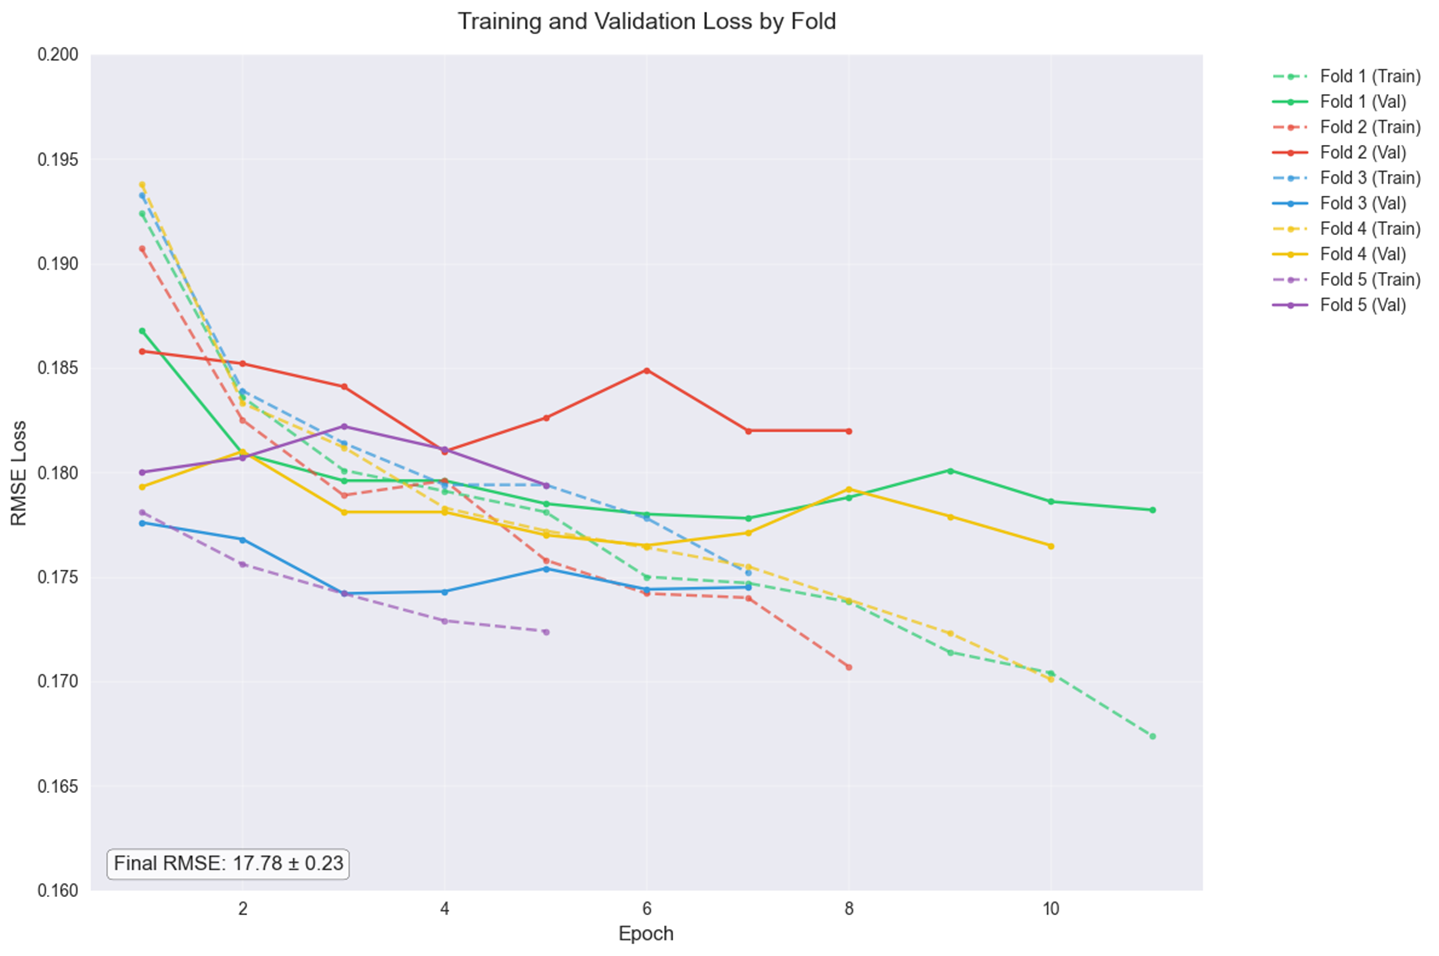
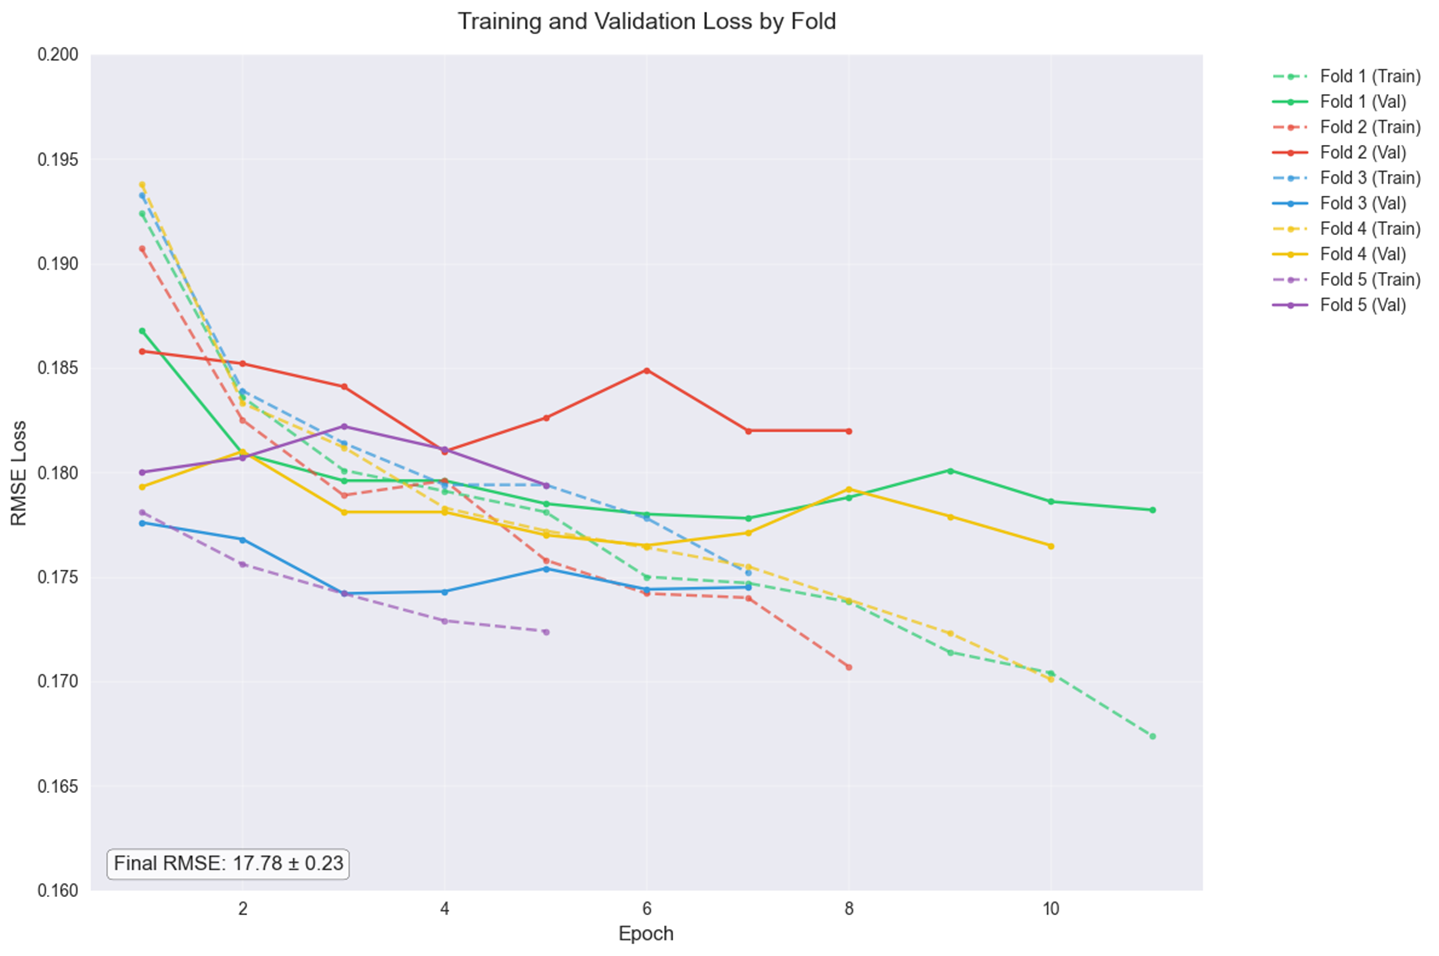

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import swin_v2_b, Swin_V2_B_Weights
from torchvision import transforms
from sklearn.model_selection import KFold
from PIL import Image
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

class PetFinderDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        
        # Normalize Pawpularity scores
        self.pawpularity_array = self.df['Pawpularity'].astype('float32').values / 100.0
        
        # Prepare metadata features
        metadata_cols = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 
                        'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 
                        'Info', 'Blur']
        self.metadata = self.df[metadata_cols].values.astype('float32')
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        metadata = torch.tensor(self.metadata[idx], dtype=torch.float32)
        pawpularity = torch.tensor(self.pawpularity_array[idx], dtype=torch.float32)
        
        return image, metadata, pawpularity

class PawpularityModel(nn.Module):
    def __init__(self, metadata_features=12):
        super().__init__()
        
        # Swin Transformer backbone
        self.image_model = swin_v2_b(weights=Swin_V2_B_Weights.IMAGENET1K_V1)
        
        # Freeze initial layers
        for param in self.image_model.parameters():
            param.requires_grad = False
        
        # Unfreeze the last 2 stages
        for param in self.image_model.features[-2:].parameters():
            param.requires_grad = True
        
        # Get number of features from the backbone
        num_features = self.image_model.head.in_features
        self.image_model.head = nn.Identity()
        
        # Metadata processing branch
        self.metadata_layers = nn.Sequential(
            nn.Linear(metadata_features, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32)
        )
        
        # Combined processing
        self.final_layers = nn.Sequential(
            nn.Linear(num_features + 32, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        
    def forward(self, image, metadata):
        img_features = self.image_model(image)
        metadata_features = self.metadata_layers(metadata)
        combined = torch.cat((img_features, metadata_features), dim=1)
        output = self.final_layers(combined)
        return output

class EarlyStopping:
    def __init__(self, patience=4, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def worker_init_fn(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

def train_fold(fold, train_df, val_df, img_dir):
    try:
        # Data augmentation
        train_transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomAffine(
                degrees=15,
                translate=(0.1, 0.1),
                scale=(0.9, 1.1)
            ),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAutocontrast(p=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        val_transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        # Create datasets and dataloaders
        train_dataset = PetFinderDataset(train_df, img_dir, transform=train_transform)
        val_dataset = PetFinderDataset(val_df, img_dir, transform=val_transform)

        train_loader = DataLoader(
            train_dataset, 
            batch_size=32, 
            shuffle=True, 
            num_workers=4,
            worker_init_fn=worker_init_fn,
            persistent_workers=True,
            pin_memory=True
        )

        val_loader = DataLoader(
            val_dataset, 
            batch_size=32, 
            shuffle=False, 
            num_workers=4,
            worker_init_fn=worker_init_fn,
            persistent_workers=True,
            pin_memory=True
        )

        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = PawpularityModel().to(device)
        criterion = nn.MSELoss()
        
        optimizer = optim.AdamW([
            {'params': model.image_model.parameters(), 'lr': 1e-5},
            {'params': model.metadata_layers.parameters(), 'lr': 1e-4},
            {'params': model.final_layers.parameters(), 'lr': 1e-4}
        ], weight_decay=0.01)
        
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=2, verbose=True
        )
        
        best_val_loss = float('inf')
        num_epochs = 15
        early_stopping = EarlyStopping(patience=4)
        
        for epoch in range(num_epochs):
            # Training
            model.train()
            train_loss = 0
            
            train_pbar = tqdm(train_loader, desc=f'Fold {fold+1}, Epoch {epoch+1}')
            for images, metadata, targets in train_pbar:
                images = images.to(device)
                metadata = metadata.to(device)
                targets = targets.to(device).view(-1, 1)
                
                optimizer.zero_grad()
                outputs = model(images, metadata)
                loss = torch.sqrt(criterion(outputs, targets))  # RMSE
                loss.backward()
                
                # Gradient clipping
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                
                optimizer.step()
                train_loss += loss.item()
                train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
            
            train_loss /= len(train_loader)
            
            # Validation
            model.eval()
            val_loss = 0
            
            with torch.no_grad():
                val_pbar = tqdm(val_loader, desc=f'Fold {fold+1}, Epoch {epoch+1} [Val]')
                for images, metadata, targets in val_pbar:
                    images = images.to(device)
                    metadata = metadata.to(device)
                    targets = targets.to(device).view(-1, 1)
                    
                    outputs = model(images, metadata)
                    loss = torch.sqrt(criterion(outputs, targets))
                    val_loss += loss.item()
                    val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
            
            val_loss /= len(val_loader)
            
            print(f'Fold {fold+1}, Epoch {epoch+1}:')
            print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
            
            scheduler.step(val_loss)
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                torch.save(model.state_dict(), f'best_model_fold_{fold+1}.pth')
                print(f'New best model saved with validation loss: {val_loss:.4f}')
            
            # Early stopping check
            early_stopping(val_loss)
            if early_stopping.early_stop:
                print(f'Early stopping triggered after epoch {epoch+1}')
                break
        
        return best_val_loss
    
    finally:
        # Proper cleanup
        if 'train_loader' in locals():
            train_loader._iterator._shutdown_workers()
        if 'val_loader' in locals():
            val_loader._iterator._shutdown_workers()

def main():
    # Set random seeds for reproducibility
    seed = 42
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    train_df = pd.read_csv('/kaggle/input/petfinder-pawpularity-score/train.csv')
    
    # K-Fold Cross Validation
    n_splits = 5
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(train_df)):
        try:
            print(f'\nTraining Fold {fold+1}/{n_splits}')
            
            train_fold_df = train_df.iloc[train_idx].reset_index(drop=True)
            val_fold_df = train_df.iloc[val_idx].reset_index(drop=True)
            
            fold_score = train_fold(
                fold,
                train_fold_df,
                val_fold_df,
                '/kaggle/input/petfinder-pawpularity-score/train'
            )
            fold_scores.append(fold_score)
            
        except Exception as e:
            print(f"Error in fold {fold+1}: {str(e)}")
            continue

    # Print final results
    print("\nCross-Validation Results:")
    for fold, score in enumerate(fold_scores, 1):
        print(f"Fold {fold}: {score:.4f}")
    print(f"Average RMSE: {np.mean(fold_scores):.4f} ± {np.std(fold_scores):.4f}")

if __name__ == "__main__":
    main()


Training Fold 1/5


Fold 1, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 1:
Train Loss: 0.1924, Val Loss: 0.1868
New best model saved with validation loss: 0.1868


Fold 1, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 2:
Train Loss: 0.1836, Val Loss: 0.1809
New best model saved with validation loss: 0.1809


Fold 1, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 3:
Train Loss: 0.1801, Val Loss: 0.1796
New best model saved with validation loss: 0.1796


Fold 1, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 4:
Train Loss: 0.1791, Val Loss: 0.1796


Fold 1, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 5:
Train Loss: 0.1781, Val Loss: 0.1785
New best model saved with validation loss: 0.1785


Fold 1, Epoch 6:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 6 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 6:
Train Loss: 0.1750, Val Loss: 0.1780
New best model saved with validation loss: 0.1780


Fold 1, Epoch 7:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 7 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 7:
Train Loss: 0.1747, Val Loss: 0.1778
New best model saved with validation loss: 0.1778


Fold 1, Epoch 8:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 8 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 8:
Train Loss: 0.1738, Val Loss: 0.1788


Fold 1, Epoch 9:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 9 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 9:
Train Loss: 0.1714, Val Loss: 0.1801


Fold 1, Epoch 10:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 10 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 10:
Train Loss: 0.1704, Val Loss: 0.1786


Fold 1, Epoch 11:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 11 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 11:
Train Loss: 0.1674, Val Loss: 0.1782
Early stopping triggered after epoch 11

Training Fold 2/5


Fold 2, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 1:
Train Loss: 0.1907, Val Loss: 0.1858
New best model saved with validation loss: 0.1858


Fold 2, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 2:
Train Loss: 0.1825, Val Loss: 0.1852
New best model saved with validation loss: 0.1852


Fold 2, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 3:
Train Loss: 0.1789, Val Loss: 0.1841
New best model saved with validation loss: 0.1841


Fold 2, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 4:
Train Loss: 0.1796, Val Loss: 0.1810
New best model saved with validation loss: 0.1810


Fold 2, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 5:
Train Loss: 0.1758, Val Loss: 0.1826


Fold 2, Epoch 6:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 6 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 6:
Train Loss: 0.1742, Val Loss: 0.1849


Fold 2, Epoch 7:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 7 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 7:
Train Loss: 0.1740, Val Loss: 0.1820


Fold 2, Epoch 8:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 8 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 8:
Train Loss: 0.1707, Val Loss: 0.1820
Early stopping triggered after epoch 8

Training Fold 3/5


Fold 3, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 1:
Train Loss: 0.1933, Val Loss: 0.1776
New best model saved with validation loss: 0.1776


Fold 3, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 2:
Train Loss: 0.1839, Val Loss: 0.1768
New best model saved with validation loss: 0.1768


Fold 3, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 3:
Train Loss: 0.1814, Val Loss: 0.1742
New best model saved with validation loss: 0.1742


Fold 3, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 4:
Train Loss: 0.1794, Val Loss: 0.1743


Fold 3, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 5:
Train Loss: 0.1794, Val Loss: 0.1754


Fold 3, Epoch 6:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 6 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 6:
Train Loss: 0.1778, Val Loss: 0.1744


Fold 3, Epoch 7:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 7 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 7:
Train Loss: 0.1752, Val Loss: 0.1745
Early stopping triggered after epoch 7

Training Fold 4/5


Fold 4, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 1:
Train Loss: 0.1938, Val Loss: 0.1793
New best model saved with validation loss: 0.1793


Fold 4, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 2:
Train Loss: 0.1833, Val Loss: 0.1810


Fold 4, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 3:
Train Loss: 0.1812, Val Loss: 0.1781
New best model saved with validation loss: 0.1781


Fold 4, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 4:
Train Loss: 0.1783, Val Loss: 0.1781
New best model saved with validation loss: 0.1781


Fold 4, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 5:
Train Loss: 0.1772, Val Loss: 0.1770
New best model saved with validation loss: 0.1770


Fold 4, Epoch 6:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 6 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 6:
Train Loss: 0.1764, Val Loss: 0.1765
New best model saved with validation loss: 0.1765


Fold 4, Epoch 7:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 7 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 7:
Train Loss: 0.1755, Val Loss: 0.1771


Fold 4, Epoch 8:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 8 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 8:
Train Loss: 0.1739, Val Loss: 0.1792


Fold 4, Epoch 9:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 9 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 9:
Train Loss: 0.1723, Val Loss: 0.1779


Fold 4, Epoch 10:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 10 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 10:
Train Loss: 0.1701, Val Loss: 0.1765
Early stopping triggered after epoch 10

Training Fold 5/5


Fold 5, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 1:
Train Loss: 0.1919, Val Loss: 0.1859
New best model saved with validation loss: 0.1859


Fold 5, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 2:
Train Loss: 0.1826, Val Loss: 0.1807
New best model saved with validation loss: 0.1807


Fold 5, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

RESNET MODEL IMAGES AND METADATA, KFOLD, FREEZING


Results: 
Validation Loss = ~0.1801

RMSE of 18.01
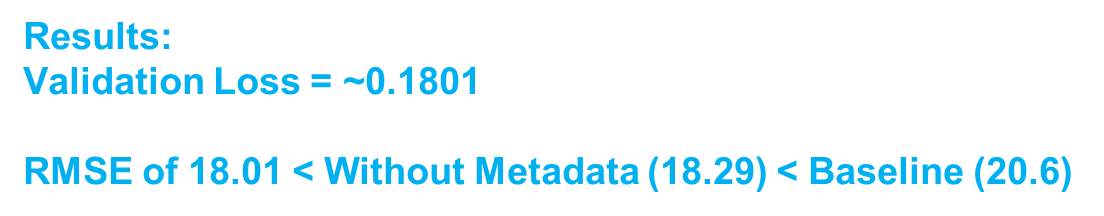
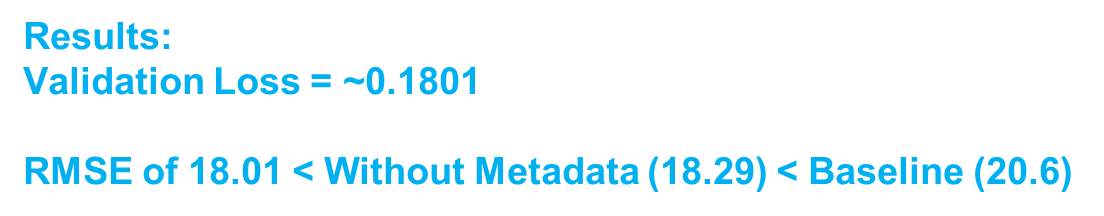
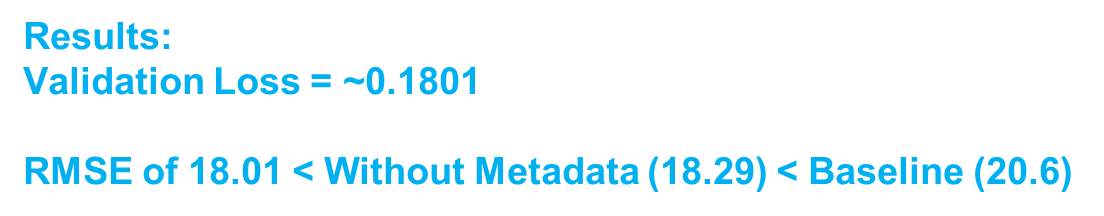
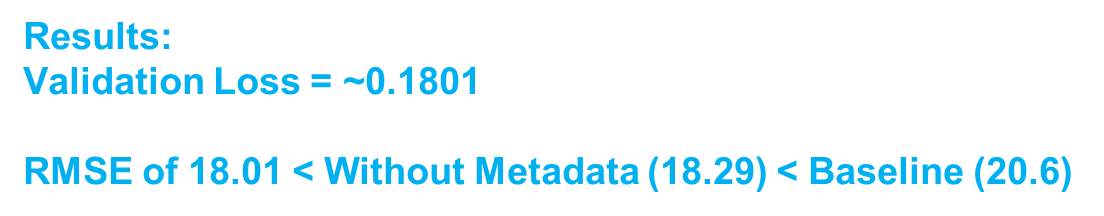

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import swin_v2_b, Swin_V2_B_Weights
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms
from sklearn.model_selection import KFold
from PIL import Image
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

class PetFinderDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        
        # Normalize Pawpularity scores
        self.pawpularity_array = self.df['Pawpularity'].astype('float32').values / 100.0
        
        # Prepare metadata features
        metadata_cols = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 
                        'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 
                        'Info', 'Blur']
        self.metadata = self.df[metadata_cols].values.astype('float32')
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        metadata = torch.tensor(self.metadata[idx], dtype=torch.float32)
        pawpularity = torch.tensor(self.pawpularity_array[idx], dtype=torch.float32)
        
        return image, metadata, pawpularity

class PawpularityModel(nn.Module):
    def __init__(self, metadata_features=12):
        super().__init__()
        
        # ResNet50 backbone
        self.image_model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        
        # Freeze initial layers
        for param in self.image_model.parameters():
            param.requires_grad = False
        
        # Unfreeze the last 2 blocks
        for param in list(self.image_model.layer3.parameters()) + list(self.image_model.layer4.parameters()):
            param.requires_grad = True
        
        # Get number of features from the backbone (2048 for ResNet50)
        num_features = self.image_model.fc.in_features
        self.image_model.fc = nn.Identity()
        
        
        self.metadata_layers = nn.Sequential(
            nn.Linear(metadata_features, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32)
        )
        
        # Combined processing
        self.final_layers = nn.Sequential(
            nn.Linear(num_features + 32, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        
    def forward(self, image, metadata):
        img_features = self.image_model(image)
        metadata_features = self.metadata_layers(metadata)
        combined = torch.cat((img_features, metadata_features), dim=1)
        output = self.final_layers(combined)
        return output

class EarlyStopping:
    def __init__(self, patience=4, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def worker_init_fn(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

def train_fold(fold, train_df, val_df, img_dir):
    try:
        # Update image size for ResNet50 (224x224 is standard)
        train_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomAffine(
                degrees=15,
                translate=(0.1, 0.1),
                scale=(0.9, 1.1)
            ),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAutocontrast(p=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        val_transform = transforms.Compose([
            transforms.Resize((224, 224)), 
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])


        # Create datasets and dataloaders
        train_dataset = PetFinderDataset(train_df, img_dir, transform=train_transform)
        val_dataset = PetFinderDataset(val_df, img_dir, transform=val_transform)

        train_loader = DataLoader(
            train_dataset, 
            batch_size=32, 
            shuffle=True, 
            num_workers=4,
            worker_init_fn=worker_init_fn,
            persistent_workers=True,
            pin_memory=True
        )

        val_loader = DataLoader(
            val_dataset, 
            batch_size=32, 
            shuffle=False, 
            num_workers=4,
            worker_init_fn=worker_init_fn,
            persistent_workers=True,
            pin_memory=True
        )

        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = PawpularityModel().to(device)
        criterion = nn.MSELoss()
        
        optimizer = optim.AdamW([
            {'params': model.image_model.parameters(), 'lr': 1e-5},
            {'params': model.metadata_layers.parameters(), 'lr': 1e-4},
            {'params': model.final_layers.parameters(), 'lr': 1e-4}
        ], weight_decay=0.01)
        
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=2, verbose=True
        )
        
        best_val_loss = float('inf')
        num_epochs = 15
        early_stopping = EarlyStopping(patience=4)
        
        for epoch in range(num_epochs):
            # Training
            model.train()
            train_loss = 0
            
            train_pbar = tqdm(train_loader, desc=f'Fold {fold+1}, Epoch {epoch+1}')
            for images, metadata, targets in train_pbar:
                images = images.to(device)
                metadata = metadata.to(device)
                targets = targets.to(device).view(-1, 1)
                
                optimizer.zero_grad()
                outputs = model(images, metadata)
                loss = torch.sqrt(criterion(outputs, targets))  # RMSE
                loss.backward()
                
                # Gradient clipping
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                
                optimizer.step()
                train_loss += loss.item()
                train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
            
            train_loss /= len(train_loader)
            
            # Validation
            model.eval()
            val_loss = 0
            
            with torch.no_grad():
                val_pbar = tqdm(val_loader, desc=f'Fold {fold+1}, Epoch {epoch+1} [Val]')
                for images, metadata, targets in val_pbar:
                    images = images.to(device)
                    metadata = metadata.to(device)
                    targets = targets.to(device).view(-1, 1)
                    
                    outputs = model(images, metadata)
                    loss = torch.sqrt(criterion(outputs, targets))
                    val_loss += loss.item()
                    val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
            
            val_loss /= len(val_loader)
            
            print(f'Fold {fold+1}, Epoch {epoch+1}:')
            print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
            
            scheduler.step(val_loss)
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                torch.save(model.state_dict(), f'best_model_fold_{fold+1}.pth')
                print(f'New best model saved with validation loss: {val_loss:.4f}')
            
            # Early stopping check
            early_stopping(val_loss)
            if early_stopping.early_stop:
                print(f'Early stopping triggered after epoch {epoch+1}')
                break
        
        return best_val_loss
    
    finally:
        # Proper cleanup
        if 'train_loader' in locals():
            train_loader._iterator._shutdown_workers()
        if 'val_loader' in locals():
            val_loader._iterator._shutdown_workers()

def main():
    # Set random seeds for reproducibility
    seed = 42
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    train_df = pd.read_csv('/kaggle/input/petfinder-pawpularity-score/train.csv')
    
    # K-Fold Cross Validation
    n_splits = 5
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(train_df)):
        try:
            print(f'\nTraining Fold {fold+1}/{n_splits}')
            
            train_fold_df = train_df.iloc[train_idx].reset_index(drop=True)
            val_fold_df = train_df.iloc[val_idx].reset_index(drop=True)
            
            fold_score = train_fold(
                fold,
                train_fold_df,
                val_fold_df,
                '/kaggle/input/petfinder-pawpularity-score/train'
            )
            fold_scores.append(fold_score)
            
        except Exception as e:
            print(f"Error in fold {fold+1}: {str(e)}")
            continue

    # Print final results
    print("\nCross-Validation Results:")
    for fold, score in enumerate(fold_scores, 1):
        print(f"Fold {fold}: {score:.4f}")
    print(f"Average RMSE: {np.mean(fold_scores):.4f} ± {np.std(fold_scores):.4f}")

if __name__ == "__main__":
    main()


Training Fold 1/5


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 208MB/s]


Fold 1, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 1:
Train Loss: 0.1938, Val Loss: 0.1855
New best model saved with validation loss: 0.1855


Fold 1, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 2:
Train Loss: 0.1814, Val Loss: 0.1835
New best model saved with validation loss: 0.1835


Fold 1, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 3:
Train Loss: 0.1761, Val Loss: 0.1824
New best model saved with validation loss: 0.1824


Fold 1, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 4:
Train Loss: 0.1705, Val Loss: 0.1818
New best model saved with validation loss: 0.1818


Fold 1, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 5:
Train Loss: 0.1645, Val Loss: 0.1829


Fold 1, Epoch 6:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 6 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 6:
Train Loss: 0.1577, Val Loss: 0.1873


Fold 1, Epoch 7:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 7 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 7:
Train Loss: 0.1515, Val Loss: 0.1876


Fold 1, Epoch 8:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 8 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 8:
Train Loss: 0.1424, Val Loss: 0.1883
Early stopping triggered after epoch 8

Training Fold 2/5


Fold 2, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 1:
Train Loss: 0.1940, Val Loss: 0.1887
New best model saved with validation loss: 0.1887


Fold 2, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 2:
Train Loss: 0.1810, Val Loss: 0.1857
New best model saved with validation loss: 0.1857


Fold 2, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 3:
Train Loss: 0.1755, Val Loss: 0.1862


Fold 2, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 4:
Train Loss: 0.1695, Val Loss: 0.1877


Fold 2, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 5:
Train Loss: 0.1629, Val Loss: 0.1865


Fold 2, Epoch 6:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 6 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 6:
Train Loss: 0.1544, Val Loss: 0.1904
Early stopping triggered after epoch 6

Training Fold 3/5


Fold 3, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 1:
Train Loss: 0.1947, Val Loss: 0.1803
New best model saved with validation loss: 0.1803


Fold 3, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 2:
Train Loss: 0.1827, Val Loss: 0.1779
New best model saved with validation loss: 0.1779


Fold 3, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 3:
Train Loss: 0.1764, Val Loss: 0.1745
New best model saved with validation loss: 0.1745


Fold 3, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 4:
Train Loss: 0.1705, Val Loss: 0.1755


Fold 3, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 5:
Train Loss: 0.1644, Val Loss: 0.1802


Fold 3, Epoch 6:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 6 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 6:
Train Loss: 0.1592, Val Loss: 0.1806


Fold 3, Epoch 7:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 7 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 7:
Train Loss: 0.1488, Val Loss: 0.1804
Early stopping triggered after epoch 7

Training Fold 4/5


Fold 4, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 1:
Train Loss: 0.1946, Val Loss: 0.1807
New best model saved with validation loss: 0.1807


Fold 4, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 2:
Train Loss: 0.1824, Val Loss: 0.1769
New best model saved with validation loss: 0.1769


Fold 4, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 3:
Train Loss: 0.1758, Val Loss: 0.1756
New best model saved with validation loss: 0.1756


Fold 4, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 4:
Train Loss: 0.1705, Val Loss: 0.1779


Fold 4, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 5:
Train Loss: 0.1636, Val Loss: 0.1803


Fold 4, Epoch 6:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 6 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 6:
Train Loss: 0.1578, Val Loss: 0.1846


Fold 4, Epoch 7:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 7 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 7:
Train Loss: 0.1493, Val Loss: 0.1856
Early stopping triggered after epoch 7

Training Fold 5/5


Fold 5, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 1:
Train Loss: 0.1947, Val Loss: 0.1836
New best model saved with validation loss: 0.1836


Fold 5, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 2:
Train Loss: 0.1816, Val Loss: 0.1860


Fold 5, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 3:
Train Loss: 0.1753, Val Loss: 0.1830
New best model saved with validation loss: 0.1830


Fold 5, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 4:
Train Loss: 0.1694, Val Loss: 0.1846


Fold 5, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 5:
Train Loss: 0.1625, Val Loss: 0.1923


Fold 5, Epoch 6:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 6 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 6:
Train Loss: 0.1557, Val Loss: 0.1888


Fold 5, Epoch 7:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 7 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 7:
Train Loss: 0.1477, Val Loss: 0.1916
Early stopping triggered after epoch 7

Cross-Validation Results:
Fold 1: 0.1818
Fold 2: 0.1857
Fold 3: 0.1745
Fold 4: 0.1756
Fold 5: 0.1830
Average RMSE: 0.1801 ± 0.0043


SAME RESNET AS BEFORE, BUT NO METADATA

Results: 
Validation Loss = ~0.1829

RMSE of 18.29
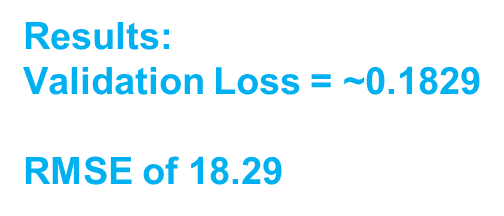
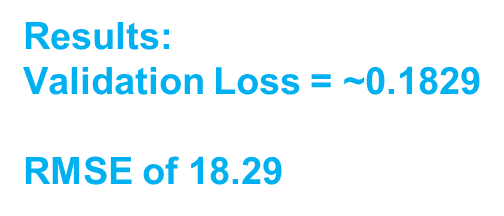
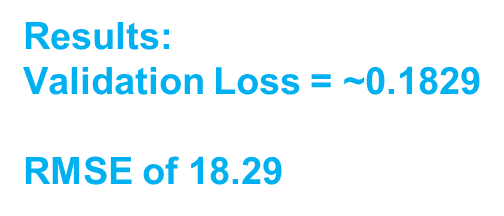
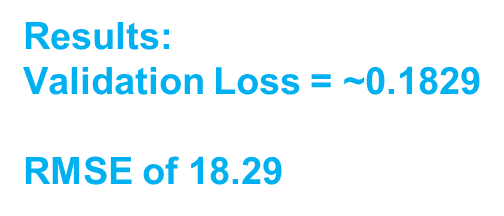

In [4]:
# Import additional required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import swin_v2_b, Swin_V2_B_Weights
from torchvision.models import resnet50, ResNet50_Weights
from torchvision import transforms
from sklearn.model_selection import KFold
from PIL import Image
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

class PetFinderDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        self.df = df
        self.img_dir = img_dir
        self.transform = transform
        
        # Only keep Pawpularity scores
        self.pawpularity_array = self.df['Pawpularity'].astype('float32').values / 100.0
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        image = Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        pawpularity = torch.tensor(self.pawpularity_array[idx], dtype=torch.float32)
        
        return image, pawpularity
    
class PawpularityModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        # ResNet50 backbone
        self.image_model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        
        # Freeze initial layers
        for param in self.image_model.parameters():
            param.requires_grad = False
        
        # Unfreeze the last 2 blocks
        for param in list(self.image_model.layer3.parameters()) + list(self.image_model.layer4.parameters()):
            param.requires_grad = True
        
        num_features = self.image_model.fc.in_features
        self.image_model.fc = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
        
    def forward(self, image):
        return self.image_model(image)

class EarlyStopping:
    def __init__(self, patience=4, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def worker_init_fn(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

def train_fold(fold, train_df, val_df, img_dir):
    try:
        # Update image size for ResNet50 (224x224 is standard)
        train_transform = transforms.Compose([
            transforms.Resize((224, 224)),  # Changed from 256x256
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomAffine(
                degrees=15,
                translate=(0.1, 0.1),
                scale=(0.9, 1.1)
            ),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
            transforms.RandomAutocontrast(p=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        val_transform = transforms.Compose([
            transforms.Resize((224, 224)), 
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        # Create datasets and dataloaders
        train_dataset = PetFinderDataset(train_df, img_dir, transform=train_transform)
        val_dataset = PetFinderDataset(val_df, img_dir, transform=val_transform)

        train_loader = DataLoader(
            train_dataset, 
            batch_size=32, 
            shuffle=True, 
            num_workers=4,
            worker_init_fn=worker_init_fn,
            persistent_workers=True,
            pin_memory=True
        )

        val_loader = DataLoader(
            val_dataset, 
            batch_size=32, 
            shuffle=False, 
            num_workers=4,
            worker_init_fn=worker_init_fn,
            persistent_workers=True,
            pin_memory=True
        )

        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = PawpularityModel().to(device)
        criterion = nn.MSELoss()
        
        optimizer = optim.AdamW([
            {'params': model.image_model.parameters(), 'lr': 1e-4}
        ], weight_decay=0.01)
        
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=2, verbose=True
        )
        
        best_val_loss = float('inf')
        num_epochs = 15
        early_stopping = EarlyStopping(patience=4)
        for epoch in range(num_epochs):
            # Training
            model.train()
            train_loss = 0
            
            train_pbar = tqdm(train_loader, desc=f'Fold {fold+1}, Epoch {epoch+1}')
            for images, targets in train_pbar:
                images = images.to(device)
                targets = targets.to(device).view(-1, 1)
                
                optimizer.zero_grad()
                outputs = model(images)
                loss = torch.sqrt(criterion(outputs, targets))  # RMSE
                loss.backward()
                
                # Gradient clipping
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                
                optimizer.step()
                train_loss += loss.item()
                train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
            
            train_loss /= len(train_loader)
            
            # Validation
            model.eval()
            val_loss = 0
            
            with torch.no_grad():
                val_pbar = tqdm(val_loader, desc=f'Fold {fold+1}, Epoch {epoch+1} [Val]')
                for images, targets in val_pbar:
                    images = images.to(device)
                    targets = targets.to(device).view(-1, 1)
                    
                    outputs = model(images)
                    loss = torch.sqrt(criterion(outputs, targets))
                    val_loss += loss.item()
                    val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
            
            val_loss /= len(val_loader)
            
            print(f'Fold {fold+1}, Epoch {epoch+1}:')
            print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
            
            scheduler.step(val_loss)
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                torch.save(model.state_dict(), f'best_model_fold_{fold+1}.pth')
                print(f'New best model saved with validation loss: {val_loss:.4f}')
            
            # Early stopping check
            early_stopping(val_loss)
            if early_stopping.early_stop:
                print(f'Early stopping triggered after epoch {epoch+1}')
                break
        
        return best_val_loss
    
    finally:
        # Proper cleanup
        if 'train_loader' in locals():
            train_loader._iterator._shutdown_workers()
        if 'val_loader' in locals():
            val_loader._iterator._shutdown_workers()

def main():
    # Set random seeds for reproducibility
    seed = 42
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    train_df = pd.read_csv('/kaggle/input/petfinder-pawpularity-score/train.csv')
    
    # K-Fold Cross Validation
    n_splits = 5
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(train_df)):
        try:
            print(f'\nTraining Fold {fold+1}/{n_splits}')
            
            train_fold_df = train_df.iloc[train_idx].reset_index(drop=True)
            val_fold_df = train_df.iloc[val_idx].reset_index(drop=True)
            
            fold_score = train_fold(
                fold,
                train_fold_df,
                val_fold_df,
                '/kaggle/input/petfinder-pawpularity-score/train'
            )
            fold_scores.append(fold_score)
            
        except Exception as e:
            print(f"Error in fold {fold+1}: {str(e)}")
            continue

    # Print final results
    print("\nCross-Validation Results:")
    for fold, score in enumerate(fold_scores, 1):
        print(f"Fold {fold}: {score:.4f}")
    print(f"Average RMSE: {np.mean(fold_scores):.4f} ± {np.std(fold_scores):.4f}")

if __name__ == "__main__":
    main()


Training Fold 1/5


Fold 1, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 1:
Train Loss: 0.1937, Val Loss: 0.1865
New best model saved with validation loss: 0.1865


Fold 1, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 2:
Train Loss: 0.1760, Val Loss: 0.1900


Fold 1, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 3:
Train Loss: 0.1630, Val Loss: 0.1876


Fold 1, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 4:
Train Loss: 0.1495, Val Loss: 0.1897


Fold 1, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 1, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 1, Epoch 5:
Train Loss: 0.1286, Val Loss: 0.1929
Early stopping triggered after epoch 5

Training Fold 2/5


Fold 2, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 1:
Train Loss: 0.1917, Val Loss: 0.1828
New best model saved with validation loss: 0.1828


Fold 2, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 2:
Train Loss: 0.1744, Val Loss: 0.1858


Fold 2, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 3:
Train Loss: 0.1617, Val Loss: 0.1881


Fold 2, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 4:
Train Loss: 0.1465, Val Loss: 0.1949


Fold 2, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 2, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 2, Epoch 5:
Train Loss: 0.1246, Val Loss: 0.1963
Early stopping triggered after epoch 5

Training Fold 3/5


Fold 3, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 1:
Train Loss: 0.1948, Val Loss: 0.1850
New best model saved with validation loss: 0.1850


Fold 3, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 2:
Train Loss: 0.1769, Val Loss: 0.1800
New best model saved with validation loss: 0.1800


Fold 3, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 3:
Train Loss: 0.1638, Val Loss: 0.1841


Fold 3, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 4:
Train Loss: 0.1483, Val Loss: 0.1830


Fold 3, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 5:
Train Loss: 0.1361, Val Loss: 0.1857


Fold 3, Epoch 6:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 3, Epoch 6 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 3, Epoch 6:
Train Loss: 0.1179, Val Loss: 0.1852
Early stopping triggered after epoch 6

Training Fold 4/5


Fold 4, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 1:
Train Loss: 0.1930, Val Loss: 0.1807
New best model saved with validation loss: 0.1807


Fold 4, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 2:
Train Loss: 0.1764, Val Loss: 0.1813


Fold 4, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 3:
Train Loss: 0.1631, Val Loss: 0.1838


Fold 4, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 4:
Train Loss: 0.1475, Val Loss: 0.1888


Fold 4, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 4, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 4, Epoch 5:
Train Loss: 0.1258, Val Loss: 0.1883
Early stopping triggered after epoch 5

Training Fold 5/5


Fold 5, Epoch 1:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 1 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 1:
Train Loss: 0.1910, Val Loss: 0.1843
New best model saved with validation loss: 0.1843


Fold 5, Epoch 2:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 2 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 2:
Train Loss: 0.1750, Val Loss: 0.1844


Fold 5, Epoch 3:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 3 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 3:
Train Loss: 0.1622, Val Loss: 0.1881


Fold 5, Epoch 4:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 4 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 4:
Train Loss: 0.1475, Val Loss: 0.1898


Fold 5, Epoch 5:   0%|          | 0/248 [00:00<?, ?it/s]

Fold 5, Epoch 5 [Val]:   0%|          | 0/62 [00:00<?, ?it/s]

Fold 5, Epoch 5:
Train Loss: 0.1261, Val Loss: 0.1946
Early stopping triggered after epoch 5

Cross-Validation Results:
Fold 1: 0.1865
Fold 2: 0.1828
Fold 3: 0.1800
Fold 4: 0.1807
Fold 5: 0.1843
Average RMSE: 0.1829 ± 0.0024


In [6]:
pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-cwo961wf
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-cwo961wf
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=6ba82d992c55037c133bb2c8ff3fef4290d1477dddee1115c8883b9ccb696942
  Stored in directory: /tmp/pip-ephem-wheel-cache-hob39c31/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip
Note: you may need to restart the kernel to use updated packages.


OPEN AI CLIP IMAGES AND METADATA:

Results: 
Validation Loss: 0.1772

RMSE of  17.72
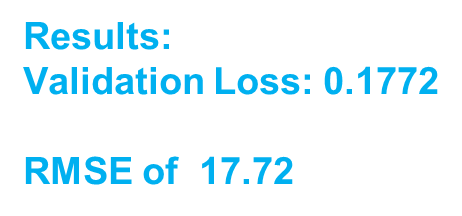
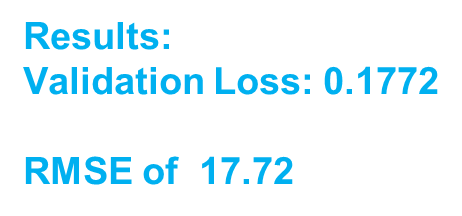
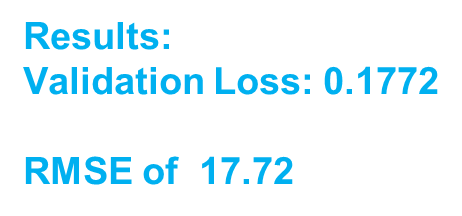
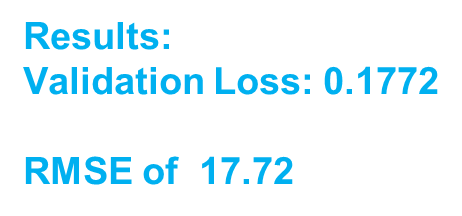


Training Fold 1/5


100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 109MiB/s]


Fold 1, Epoch 1:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 1, Epoch 1 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 1, Epoch 1:
Train Loss: 0.1902, Val Loss: 0.1777
New best model saved with validation loss: 0.1777


Fold 1, Epoch 2:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 1, Epoch 2 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 1, Epoch 2:
Train Loss: 0.1774, Val Loss: 0.1765
New best model saved with validation loss: 0.1765


Fold 1, Epoch 3:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 1, Epoch 3 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 1, Epoch 3:
Train Loss: 0.1737, Val Loss: 0.1759
New best model saved with validation loss: 0.1759


Fold 1, Epoch 4:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 1, Epoch 4 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 1, Epoch 4:
Train Loss: 0.1725, Val Loss: 0.1755
New best model saved with validation loss: 0.1755


Fold 1, Epoch 5:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 1, Epoch 5 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 1, Epoch 5:
Train Loss: 0.1708, Val Loss: 0.1776


Fold 1, Epoch 6:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 1, Epoch 6 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 1, Epoch 6:
Train Loss: 0.1680, Val Loss: 0.1764


Fold 1, Epoch 7:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 1, Epoch 7 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 1, Epoch 7:
Train Loss: 0.1664, Val Loss: 0.1777


Fold 1, Epoch 8:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 1, Epoch 8 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 1, Epoch 8:
Train Loss: 0.1631, Val Loss: 0.1769
Early stopping triggered after epoch 8


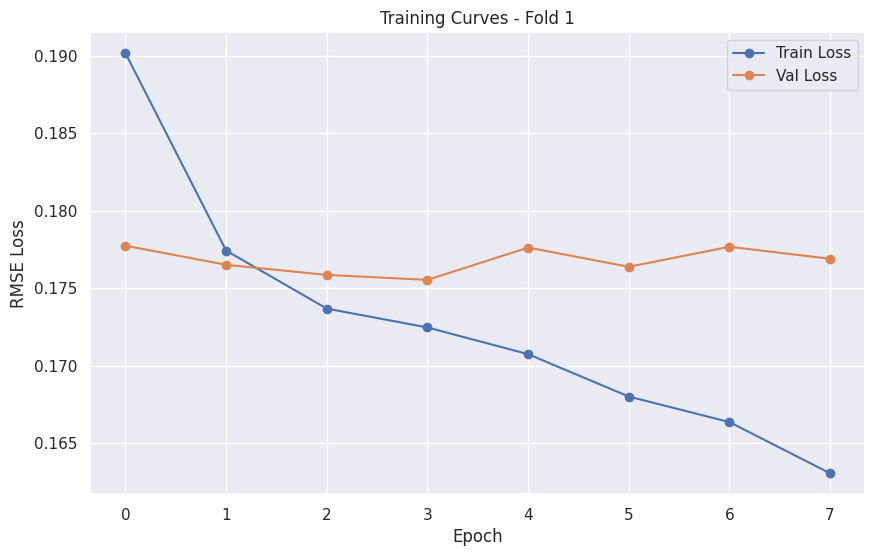


Training Fold 2/5


Fold 2, Epoch 1:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 2, Epoch 1 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 2, Epoch 1:
Train Loss: 0.1905, Val Loss: 0.1791
New best model saved with validation loss: 0.1791


Fold 2, Epoch 2:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 2, Epoch 2 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 2, Epoch 2:
Train Loss: 0.1782, Val Loss: 0.1765
New best model saved with validation loss: 0.1765


Fold 2, Epoch 3:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 2, Epoch 3 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 2, Epoch 3:
Train Loss: 0.1738, Val Loss: 0.1761
New best model saved with validation loss: 0.1761


Fold 2, Epoch 4:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 2, Epoch 4 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 2, Epoch 4:
Train Loss: 0.1722, Val Loss: 0.1774


Fold 2, Epoch 5:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 2, Epoch 5 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 2, Epoch 5:
Train Loss: 0.1698, Val Loss: 0.1757
New best model saved with validation loss: 0.1757


Fold 2, Epoch 6:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 2, Epoch 6 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 2, Epoch 6:
Train Loss: 0.1682, Val Loss: 0.1763


Fold 2, Epoch 7:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 2, Epoch 7 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 2, Epoch 7:
Train Loss: 0.1666, Val Loss: 0.1767


Fold 2, Epoch 8:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 2, Epoch 8 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 2, Epoch 8:
Train Loss: 0.1650, Val Loss: 0.1828


Fold 2, Epoch 9:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 2, Epoch 9 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 2, Epoch 9:
Train Loss: 0.1610, Val Loss: 0.1765
Early stopping triggered after epoch 9


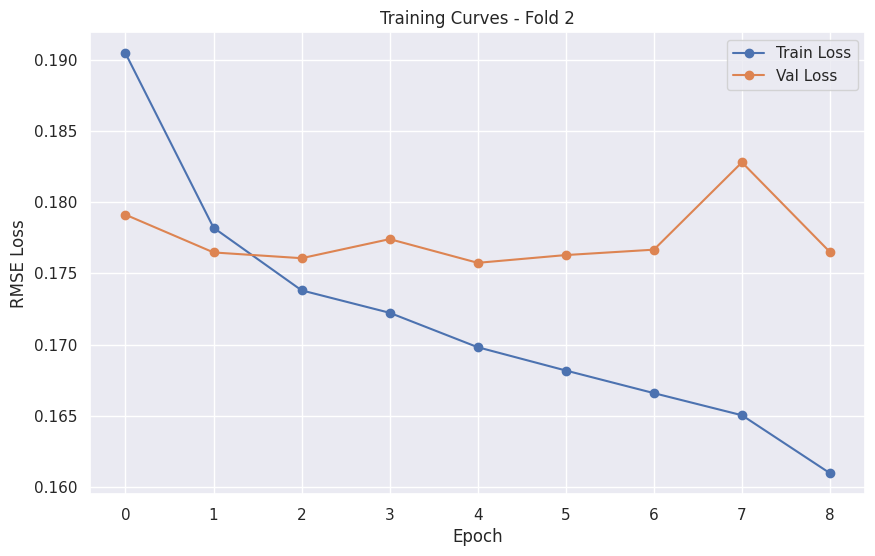


Training Fold 3/5


Fold 3, Epoch 1:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 3, Epoch 1 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 3, Epoch 1:
Train Loss: 0.1915, Val Loss: 0.1716
New best model saved with validation loss: 0.1716


Fold 3, Epoch 2:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 3, Epoch 2 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 3, Epoch 2:
Train Loss: 0.1790, Val Loss: 0.1730


Fold 3, Epoch 3:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 3, Epoch 3 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 3, Epoch 3:
Train Loss: 0.1754, Val Loss: 0.1698
New best model saved with validation loss: 0.1698


Fold 3, Epoch 4:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 3, Epoch 4 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 3, Epoch 4:
Train Loss: 0.1742, Val Loss: 0.1721


Fold 3, Epoch 5:   0%|          | 0/496 [00:00<?, ?it/s]

Fold 3, Epoch 5 [Val]:   0%|          | 0/124 [00:00<?, ?it/s]

Fold 3, Epoch 5:
Train Loss: 0.1707, Val Loss: 0.1703


Fold 3, Epoch 6:   0%|          | 0/496 [00:00<?, ?it/s]

In [ ]:
# Import additional required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold
from PIL import Image
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import warnings
import clip  # Import CLIP
warnings.filterwarnings("ignore", category=UserWarning)

class PetFinderDataset(Dataset):
    def __init__(self, df, img_dir, clip_preprocess=None):
        self.df = df
        self.img_dir = img_dir
        self.clip_preprocess = clip_preprocess
        
        # Normalize Pawpularity scores
        self.pawpularity_array = self.df['Pawpularity'].astype('float32').values / 100.0
        
        # Prepare metadata features
        metadata_cols = ['Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 
                        'Accessory', 'Group', 'Collage', 'Human', 'Occlusion', 
                        'Info', 'Blur']
        self.metadata = self.df[metadata_cols].values.astype('float32')
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_id = self.df.iloc[idx]['Id']
        img_path = os.path.join(self.img_dir, f'{img_id}.jpg')
        image = Image.open(img_path).convert('RGB')
        
        if self.clip_preprocess:
            image = self.clip_preprocess(image)
        
        metadata = torch.tensor(self.metadata[idx], dtype=torch.float32)
        pawpularity = torch.tensor(self.pawpularity_array[idx], dtype=torch.float32)
        
        return image, metadata, pawpularity

class PawpularityModel(nn.Module):
    def __init__(self, metadata_features=12):
        super().__init__()
        
        # Load CLIP model
        self.clip_model, _ = clip.load("ViT-B/32", device='cuda' if torch.cuda.is_available() else 'cpu')
        
        # Freeze CLIP parameters
        for param in self.clip_model.parameters():
            param.requires_grad = False
        
        # Unfreeze the last few transformer layers
        for param in self.clip_model.visual.transformer.resblocks[-4:].parameters():
            param.requires_grad = True
        
        # Get CLIP's visual output dimension (512 for ViT-B/32)
        clip_features = self.clip_model.visual.output_dim
        
        # Metadata processing
        self.metadata_layers = nn.Sequential(
            nn.Linear(metadata_features, 64),
            nn.LayerNorm(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32)
        )
        
        # Combined processing
        self.final_layers = nn.Sequential(
            nn.Linear(clip_features + 32, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
        
    def forward(self, image, metadata):
        # Get CLIP visual features
        with torch.no_grad():
            img_features = self.clip_model.encode_image(image)
        
        # Process metadata
        metadata_features = self.metadata_layers(metadata)
        
        # Combine features
        combined = torch.cat((img_features, metadata_features), dim=1)
        output = self.final_layers(combined)
        return output

class EarlyStopping:
    def __init__(self, patience=4, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def worker_init_fn(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

def train_fold(fold, train_df, val_df, img_dir):
    try:
        # Get CLIP's preprocessing
        _, preprocess = clip.load("ViT-B/32", device='cuda' if torch.cuda.is_available() else 'cpu')
        
        # Create datasets and dataloaders
        train_dataset = PetFinderDataset(train_df, img_dir, clip_preprocess=preprocess)
        val_dataset = PetFinderDataset(val_df, img_dir, clip_preprocess=preprocess)

        train_loader = DataLoader(
            train_dataset, 
            batch_size=16,  # Reduced batch size due to CLIP's memory usage
            shuffle=True, 
            num_workers=4,
            worker_init_fn=worker_init_fn,
            persistent_workers=True,
            pin_memory=True
        )

        val_loader = DataLoader(
            val_dataset, 
            batch_size=16,  # Reduced batch size due to CLIP's memory usage
            shuffle=False, 
            num_workers=4,
            worker_init_fn=worker_init_fn,
            persistent_workers=True,
            pin_memory=True
        )

        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = PawpularityModel().to(device)
        criterion = nn.MSELoss()
        
        # Separate lr for different components
        optimizer = optim.AdamW([
            {'params': model.clip_model.parameters(), 'lr': 1e-5},
            {'params': model.metadata_layers.parameters(), 'lr': 1e-4},
            {'params': model.final_layers.parameters(), 'lr': 1e-4}
        ], weight_decay=0.01)
        
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=2, verbose=True
        )
        
        best_val_loss = float('inf')
        num_epochs = 15
        early_stopping = EarlyStopping(patience=4)
        
        # Lists to store losses for plotting
        train_losses = []
        val_losses = []
        
        for epoch in range(num_epochs):
            # Training
            model.train()
            train_loss = 0
            
            train_pbar = tqdm(train_loader, desc=f'Fold {fold+1}, Epoch {epoch+1}')
            for images, metadata, targets in train_pbar:
                images = images.to(device)
                metadata = metadata.to(device)
                targets = targets.to(device).view(-1, 1)
                
                optimizer.zero_grad()
                outputs = model(images, metadata)
                loss = torch.sqrt(criterion(outputs, targets))  # RMSE
                loss.backward()
                
                # Gradient clipping
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                
                optimizer.step()
                train_loss += loss.item()
                train_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
            
            train_loss /= len(train_loader)
            train_losses.append(train_loss)
            
            # Validation
            model.eval()
            val_loss = 0
            
            with torch.no_grad():
                val_pbar = tqdm(val_loader, desc=f'Fold {fold+1}, Epoch {epoch+1} [Val]')
                for images, metadata, targets in val_pbar:
                    images = images.to(device)
                    metadata = metadata.to(device)
                    targets = targets.to(device).view(-1, 1)
                    
                    outputs = model(images, metadata)
                    loss = torch.sqrt(criterion(outputs, targets))
                    val_loss += loss.item()
                    val_pbar.set_postfix({'loss': f'{loss.item():.4f}'})
            
            val_loss /= len(val_loader)
            val_losses.append(val_loss)
            
            print(f'Fold {fold+1}, Epoch {epoch+1}:')
            print(f'Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
            
            scheduler.step(val_loss)
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                torch.save(model.state_dict(), f'best_model_fold_{fold+1}.pth')
                print(f'New best model saved with validation loss: {val_loss:.4f}')
            
            # Early stopping check
            early_stopping(val_loss)
            if early_stopping.early_stop:
                print(f'Early stopping triggered after epoch {epoch+1}')
                break
        
        # Plot training curves
        plt.figure(figsize=(10, 6))
        plt.plot(train_losses, label='Train Loss', marker='o')
        plt.plot(val_losses, label='Val Loss', marker='o')
        plt.title(f'Training Curves - Fold {fold+1}')
        plt.xlabel('Epoch')
        plt.ylabel('RMSE Loss')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        return best_val_loss
    
    finally:
        # Proper cleanup
        if 'train_loader' in locals():
            train_loader._iterator._shutdown_workers()
        if 'val_loader' in locals():
            val_loader._iterator._shutdown_workers()

def main():
    # Set random seeds for reproducibility
    seed = 42
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    train_df = pd.read_csv('/kaggle/input/petfinder-pawpularity-score/train.csv')
    
    # K-Fold Cross Validation
    n_splits = 5
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(train_df)):
        try:
            print(f'\nTraining Fold {fold+1}/{n_splits}')
            
            train_fold_df = train_df.iloc[train_idx].reset_index(drop=True)
            val_fold_df = train_df.iloc[val_idx].reset_index(drop=True)
            
            fold_score = train_fold(
                fold,
                train_fold_df,
                val_fold_df,
                '/kaggle/input/petfinder-pawpularity-score/train'
            )
            fold_scores.append(fold_score)
            
        except Exception as e:
            print(f"Error in fold {fold+1}: {str(e)}")
            continue

    # Print final results
    print("\nCross-Validation Results:")
    for fold, score in enumerate(fold_scores, 1):
        print(f"Fold {fold}: {score:.4f}")
    print(f"Average RMSE: {np.mean(fold_scores):.4f} ± {np.std(fold_scores):.4f}")

    # Plot final results
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(fold_scores) + 1), fold_scores)
    plt.axhline(y=np.mean(fold_scores), color='r', linestyle='--', label='Mean RMSE')
    plt.title('RMSE Scores Across Folds')
    plt.xlabel('Fold')
    plt.ylabel('RMSE Score')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()